In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import matplotlib
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd
import itertools
import seaborn as sns

In [2]:
print('np:', np.__version__)
print('pd:', pd.__version__)
print('nx:', nx.__version__)
print('matplotlib:', matplotlib.__version__)
print('seaborn:', sns.__version__)
print('powerlaw:', powerlaw.__version__)

np: 1.26.4
pd: 2.1.4
nx: 3.1
matplotlib: 3.8.0
seaborn: 0.12.2
powerlaw: 1.5


In [3]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
file_lst = ['0306','0709','10','11_phy','12_phy_cm','12_phy_eqm']

# 함수 정의

In [5]:
def graph(file_name):
    '''
    개별 교과(목)의 성취기준을 묶어서 네트워크를 만듦.
    '''
    G = nx.Graph()

    f = open(f"ENG_All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                continue
            else:
                G.add_node(i)
        # 에지 ij와 그의 weight 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 i의 노드 강도 추가
    f = open(f"ENG_All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
    
    return G

In [6]:
def subject_graph(itr, seed, k, file_name):
    '''
    개별 교과(목)의 성취기준을 묶어서 네트워크를 만들고, 노드와 에지에 대한 정보를 시각적으로 표시.
    단, 함수 fruchterman_reingold_layout를 활용하여, 그림이 무작위하게 나오지 않게 방지.
    itr, seed, k 변수는 해당 함수의 파라미터를 의미하고 다음과 같다:
    - itr = Number of iterations of spring-force relaxation
    - seed = Seed number
    - k = Optimal distance between nodes.
    '''
    G = nx.Graph()

    f = open(f"ENG_All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                continue
            else:
                G.add_node(i)
        # 에지 ij와 그의 weight 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 i의 노드 강도 추가
    f = open(f"ENG_All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = plt.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.fruchterman_reingold_layout(G, k=k, iterations=itr, weight='weight', seed=seed)  # 그래프의 노드 위치 결정
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size=100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Node strength') ##'ax=ax' 지정
    
    plt.show()

In [7]:
def entire_Graph():
    '''
    모든 교과(목)의 성취기준을 묶어서 네트워크를 만듦.
    '''
    G = nx.Graph()
    
    for file_name in file_lst:
        f = open(f"ENG_All_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            # 노드 i 추가
            for i in data_line:
                if G.has_node(i):
                    continue
                else:
                    G.add_node(i)        
            # 에지 ij와 그의 weight 추가
            for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
        # 노드 i의 노드 강도 추가
        f = open(f"ENG_All_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            for i in data_line:
                sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
                G.nodes[i]['weight'] = sum_weight
    return G

In [8]:
def basic_info(G):
    '''
    Edge degree dist, Node strength dist, Edge weight dist 값
    (여기서 node weight는 node strenght를 의미)
    '''
    hist_edges = []
    hist_nodeWeight = []
    hist_edgeWeight = []

    for i in list(G.nodes):
        hist_edges.append(G.degree[i])
        hist_nodeWeight.append(G.nodes[i]['weight'])

    for edge in list(G.edges):
        i, j = edge[0], edge[1]
        hist_edgeWeight.append(G[i][j]['weight'])

    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    
    print(f'Degree avg: {round(np.average(hist_edges), 2)}, Degree std: {round(np.std(hist_edges), 2)}')
    print(f'EdgeWeight avg: {round(np.average(hist_edgeWeight), 2)}, EdgeWeight std: {round(np.std(hist_edgeWeight), 2)}')
    print(f'NodeWeight avg: {round(np.average(hist_nodeWeight), 2)}, NodeWeight std: {round(np.std(hist_nodeWeight), 2)}')
    
    return hist_edges, hist_edgeWeight, hist_nodeWeight

In [9]:
def hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight):
    '''
    Edge degree dist, Node strength dist, Edge weight dist 그림
    (여기서 node weight는 node strenght를 의미)
    '''
    plt.figure(figsize=(13,4), dpi=300)
    
    plt.subplot(1,3,1)
    plt.title('Dist. of node degree')
    plt.hist(hist_edges)
    plt.yscale('log')
    plt.xlabel('Node degree')
    
    plt.subplot(1,3,2)
    plt.title('Dist. of edge weight')
    plt.hist(hist_edgeWeight)
    plt.yscale('log')
    plt.xlabel('Edge weight')

    plt.subplot(1,3,3)
    plt.title('Dist. of node strength')
    plt.hist(hist_nodeWeight)
    plt.yscale('log')
    plt.xlabel('Node strength')

In [10]:
def power_plot(hist_edges, hist_edgeWeight, hist_nodeWeight):
    '''
    분포가 멱급수 분포를 따르는지 확인.
    '''
    # Dist. of degree
    fit = powerlaw.Fit(hist_edges)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of degree: Pass, {fit.power_law.alpha}\n")

    # Dist. of edge weight
    fit = powerlaw.Fit(hist_edgeWeight)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of degree: Pass, {fit.power_law.alpha}\n")

    # Dist. of node strength
    fit = powerlaw.Fit(hist_nodeWeight)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of node strength: Pass, {fit.power_law.alpha}\n")

In [11]:
def info(G):
    '''
    Node degree, Node strength, Edge weight, BC 값이 큰 노드 또는 에지 나열.
    '''
    node_degree = dict(G.degree())

    # 각 엣지의 가중치(weight) 계산
    edge_weight = dict(nx.get_edge_attributes(G, 'weight'))

    # 각 노드의 강도(weight) 계산
    node_strength = dict(nx.degree(G, weight='weight'))

    # betweenness centrality 계산
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')

    # 결과 출력
    #print("Node Degree:")
    data = sorted(node_degree.items(), key=lambda x: x[1], reverse=True)
    df2 = pd.DataFrame(data, columns=['Node_ND','Node Degree'])

    #print("\nEdge Weight:")
    data = sorted(edge_weight.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Edge', 'Edge Weight'])

    #print("\nNode Strength:")
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df4 = pd.DataFrame(data, columns=['Node_NS', 'Node Strength'])

    #print("\nBetweenness Centrality:")
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', 'Betweenness Centrality'])

    df = pd.concat([df2,df3,df4,df5],axis=1)
    
    return df

# 1. 전체 언어 네트워크 

## 전체 언어 네트워크 기본 통계

In [12]:
G = entire_Graph()

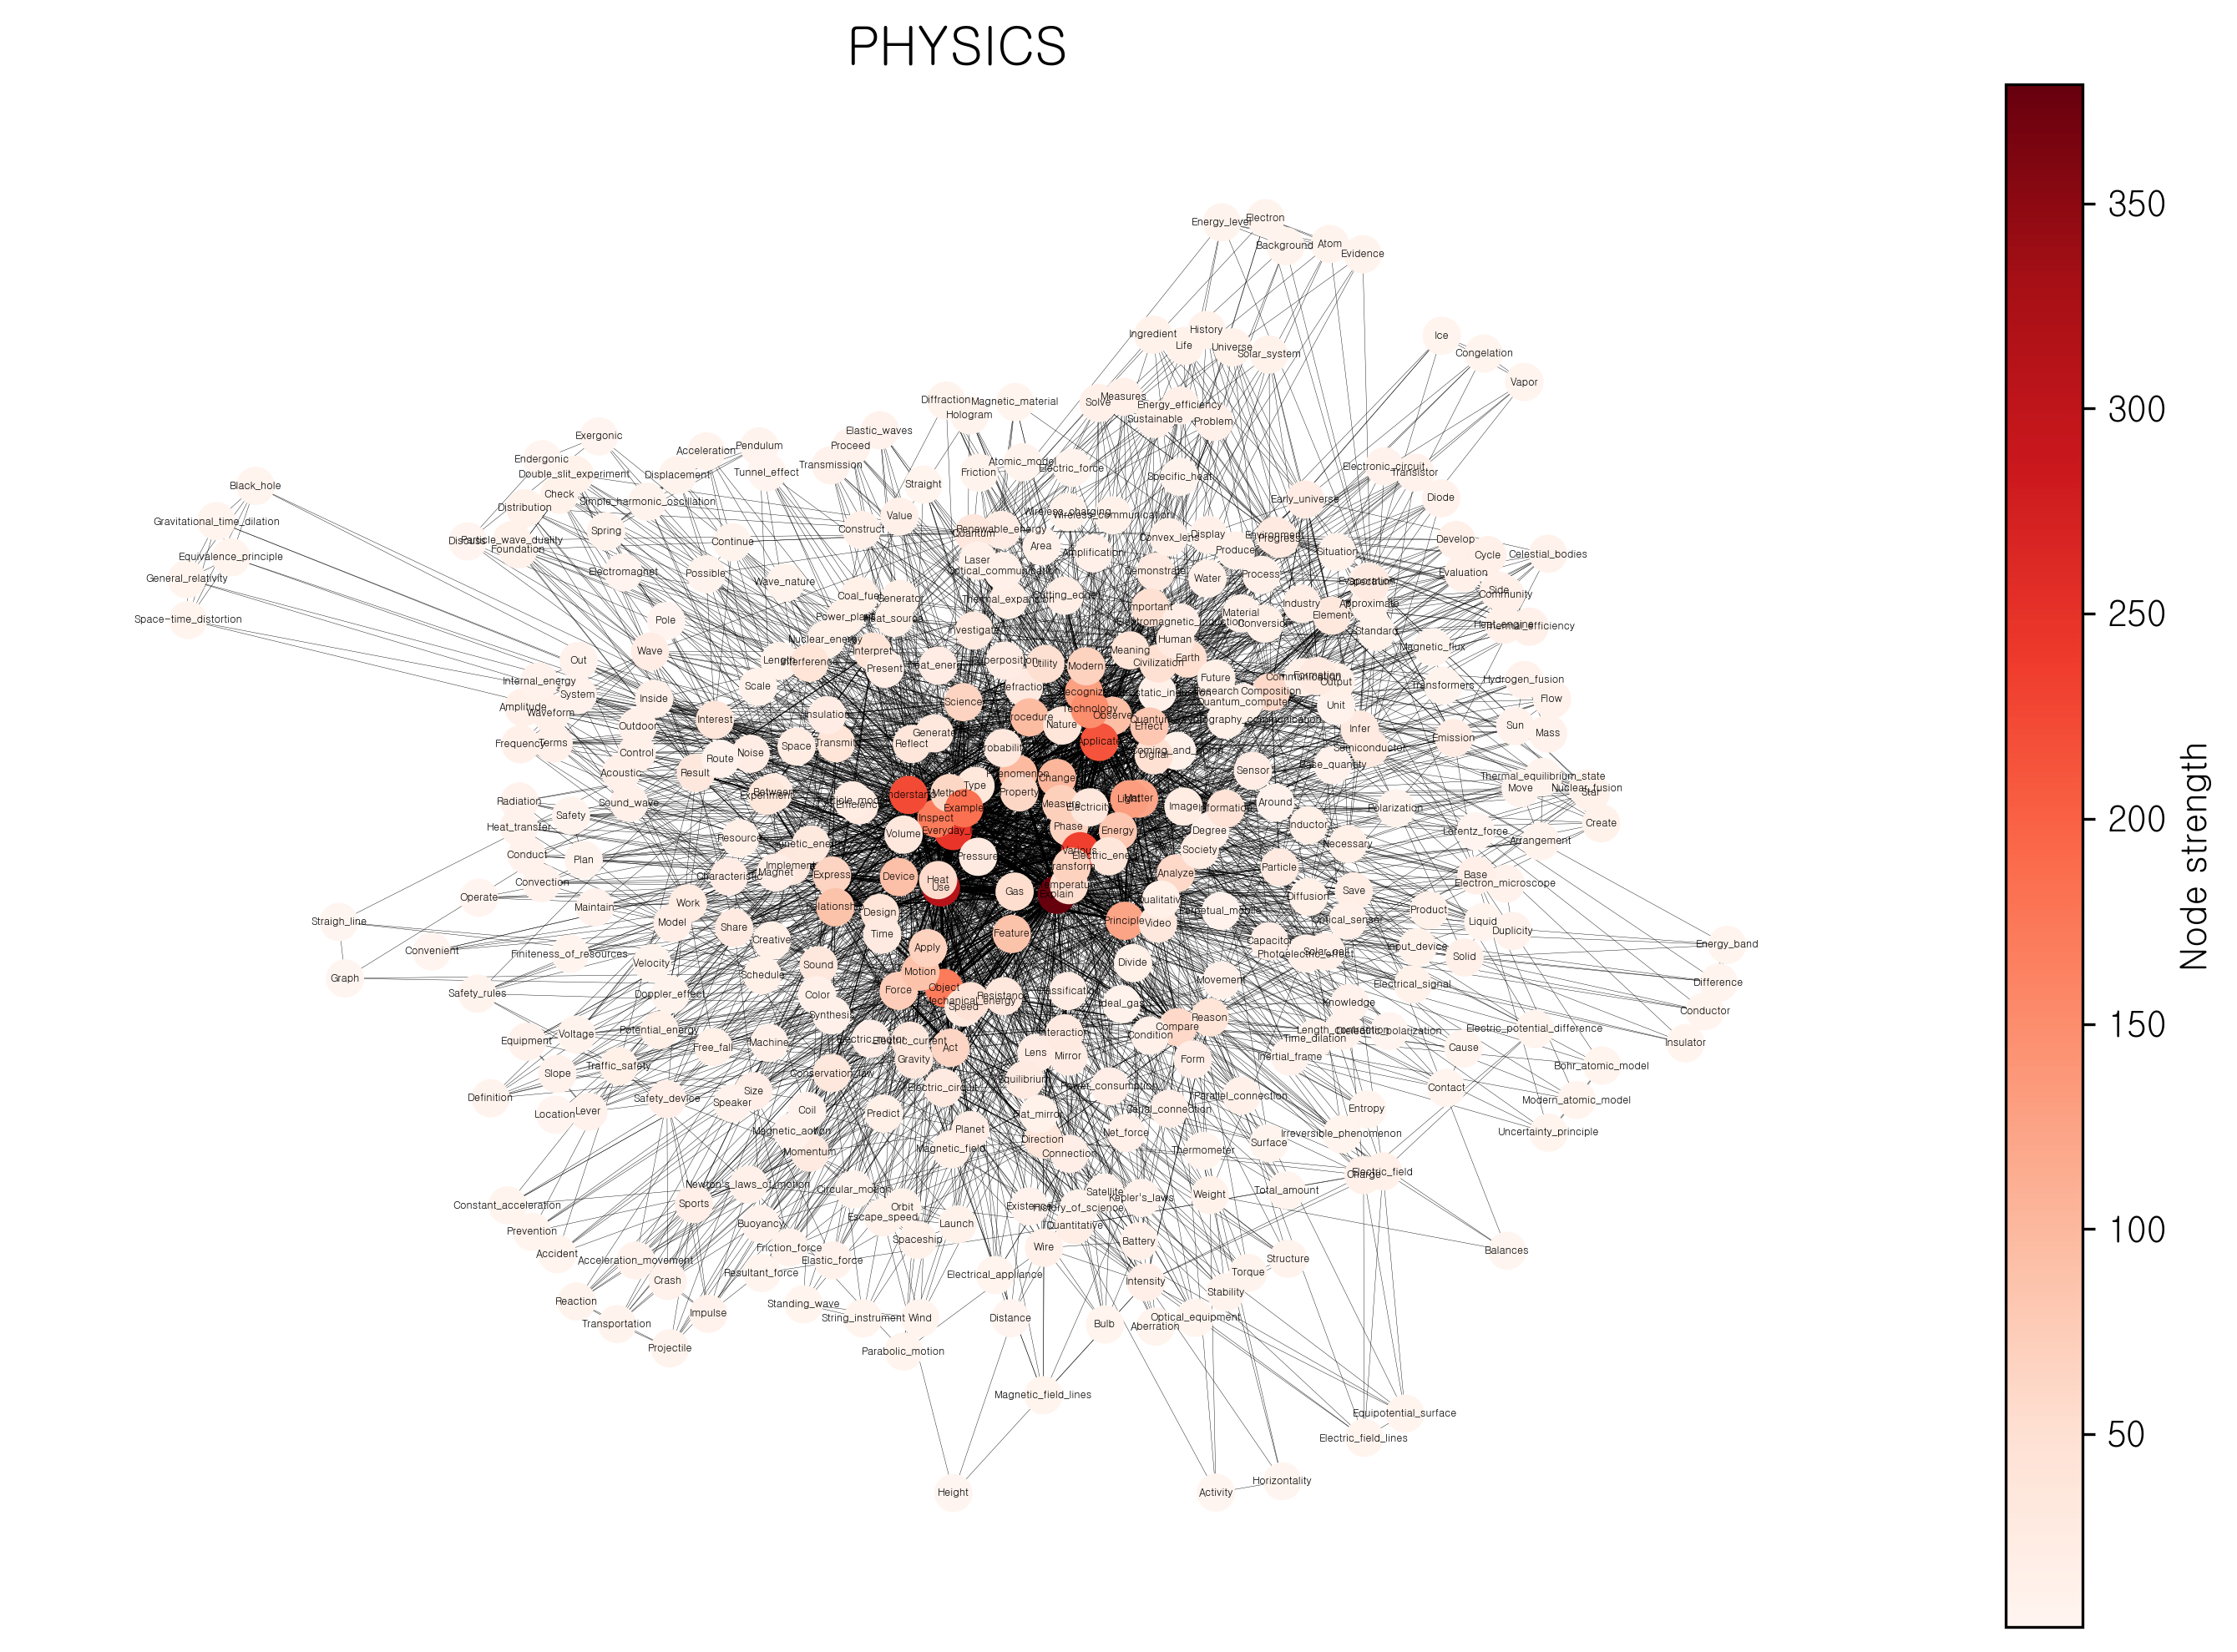

In [13]:
# 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

# 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
#node_size = [node_weights[node] * 0.1 for node in G.nodes()]
edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]

# 노드 색상 매핑을 위한 컬러맵 설정
cmap = plt.get_cmap('Reds')  # viridis 컬러맵 사용
norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

# 노드 색상 설정
node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

# 그래프 그리기
pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
plt.title('PHYSICS', fontsize=15)
nx.draw(G, pos, with_labels=True,
        node_color=node_colors, node_size=100, width=edge_width,
        font_family = font, font_size=3)

# 컬러바
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Node strength')

plt.show()

In [14]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)

Number of nodes: 389
Number of edges: 3931
Degree avg: 20.21, Degree std: 23.73
EdgeWeight avg: 1.27, EdgeWeight std: 0.89
NodeWeight avg: 25.72, NodeWeight std: 40.47


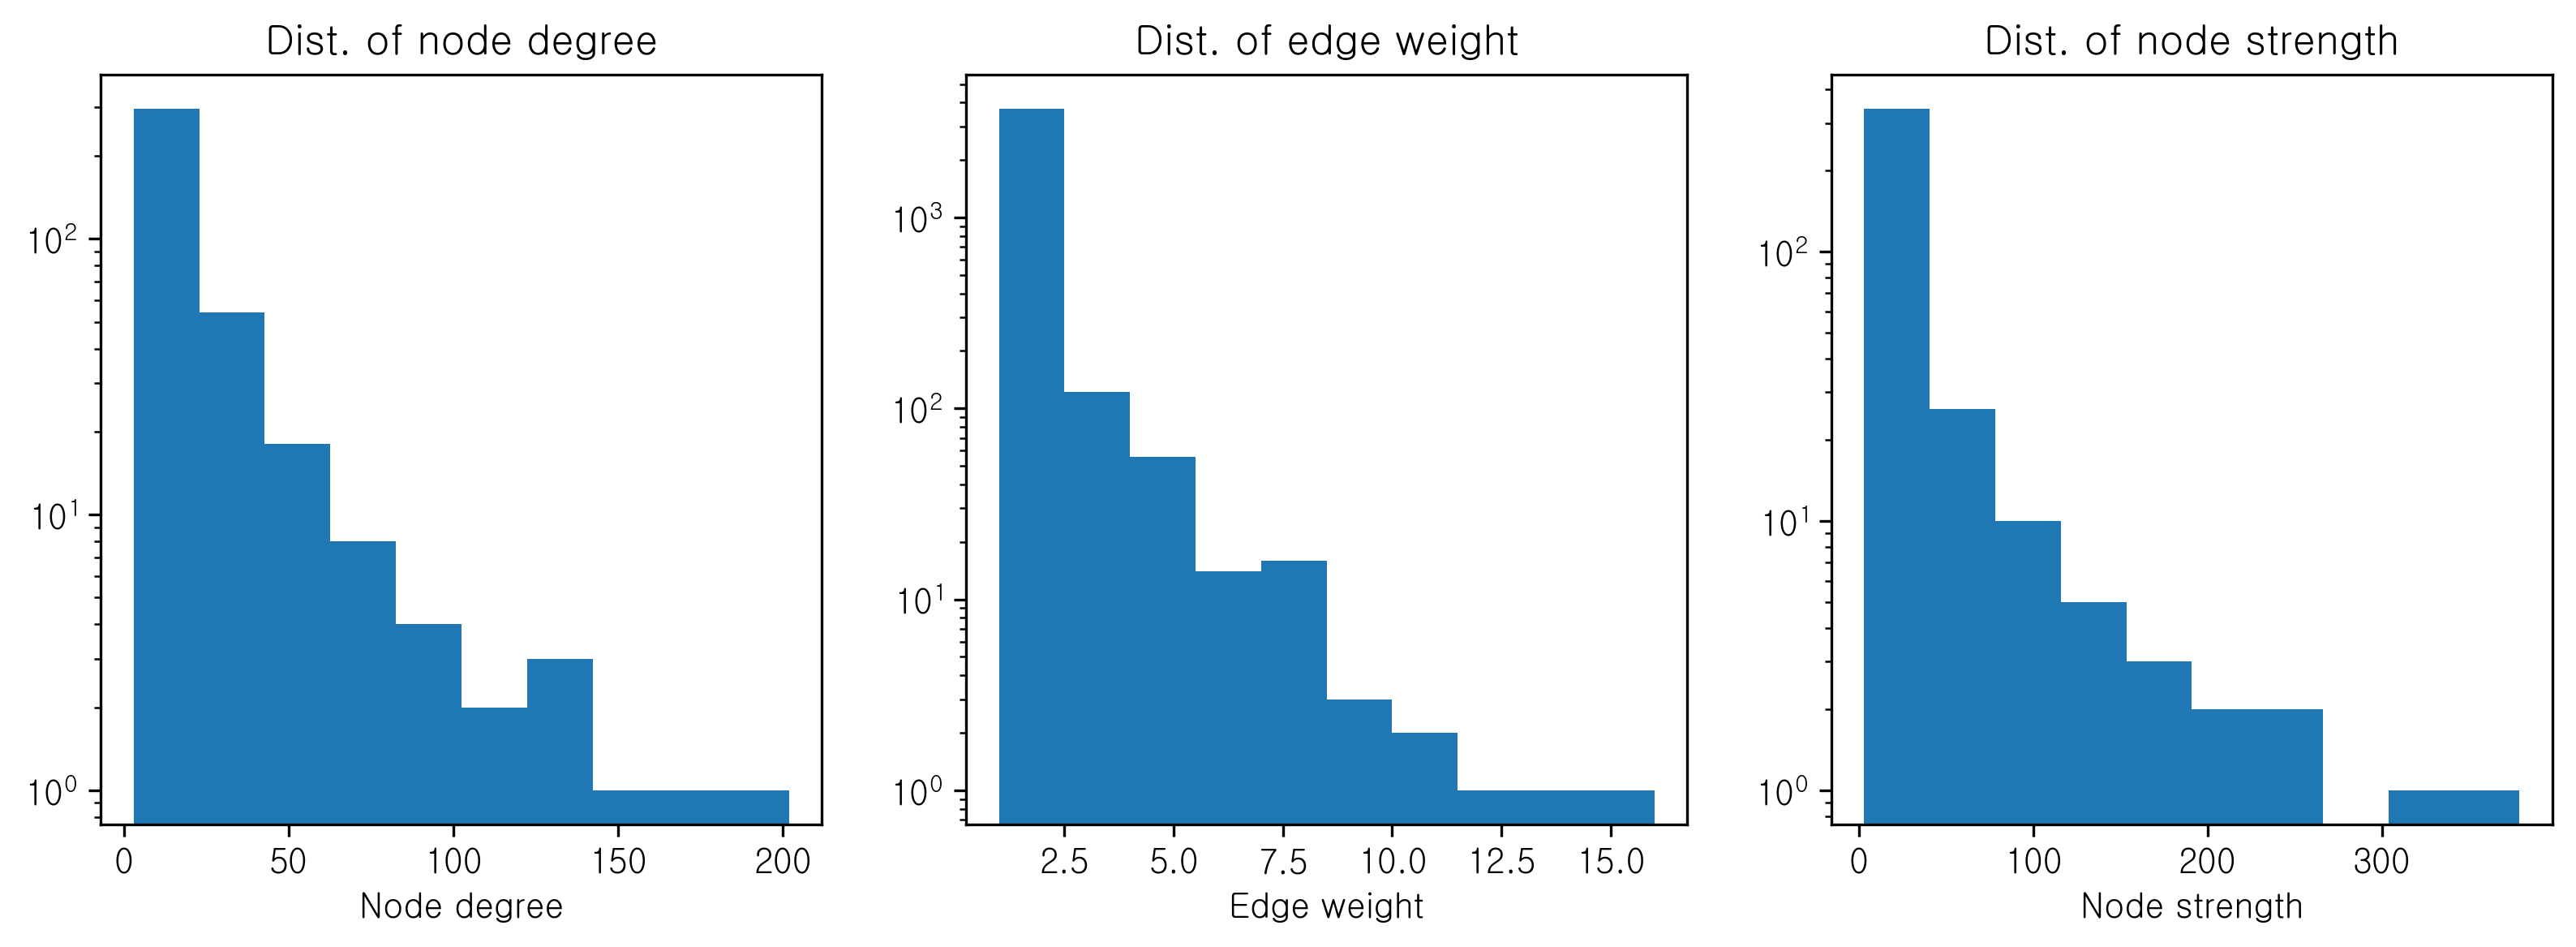

In [15]:
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [16]:
power_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

Calculating best minimal value for power law fit
Dist. of degree: Pass, 2.6497048990159278

Calculating best minimal value for power law fit
Dist. of degree: Pass, 7.712095487996254

Calculating best minimal value for power law fit
Dist. of node strength: Pass, 2.1763482342086684



C:\Users\sec\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [17]:
df = info(G)
df.head(20)

Node_ND  Node Degree                        Edge  Edge Weight  \
0         Explain        202.0              (Use, Explain)           16   
1             Use        165.0        (Everyday_life, Use)           13   
2   Everyday_life        144.0          (Various, Explain)           12   
3      Understand        139.0              (Use, Inspect)           10   
4         Various        137.0               (Use, Device)           10   
5       Applicate        128.0       (Phenomenon, Explain)            9   
6         Example        113.0               (Object, Use)            9   
7         Inspect        108.0       (Explain, Understand)            9   
8          Object         94.0    (Everyday_life, Inspect)            8   
9       Principle         90.0    (Everyday_life, Example)            8   
10     Technology         90.0       (Phenomenon, Observe)            8   
11          Light         83.0            (Object, Motion)            8   
12      Recognize         79.0           (Use, Understand)            8   
13      Procedure         78.0          (Explain, Feature)            8   
14         Matter         77.0      (Applicate, Recognize)            8   
15         Change         70.0     (Applicate, Technology)            8   
16         Energy         68.0    (Everyday_life, Various)            7   
17     Phenomenon         67.0  (Everyday_life, Applicate)            7   
18         Effect         65.0           (Object, Explain)            7   
19        Observe         64.0              (Use, Various)            7   

          Node_NS  Node Strength        Node_BC  Betweenness Centrality  
0         Explain          379.0        Explain                0.157062  
1             Use          309.0            Use                0.117353  
2   Everyday_life          247.0     Understand                0.097690  
3         Various          234.0  Everyday_life                0.086937  
4      Understand          222.0        Various                0.084668  
5       Applicate          214.0      Applicate                0.077696  
6         Example          185.0         Object                0.070829  
7          Object          171.0        Example                0.063079  
8         Inspect          171.0        Inspect                0.060435  
9      Technology          150.0      Principle                0.056064  
10          Light          132.0          Light                0.052012  
11      Recognize          129.0     Technology                0.051343  
12      Principle          124.0      Procedure                0.045969  
13         Matter          122.0        Observe                0.045438  
14         Change          103.0         Matter                0.043400  
15     Phenomenon           97.0      Recognize                0.042333  
16      Procedure           96.0         Change                0.041120  
17        Observe           93.0     Phenomenon                0.040560  
18         Device           92.0   Relationship                0.040459  
19         Motion           89.0         Motion                0.039600

## Node Strength 기준 핵심 용어

In [18]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total        Node_NS   0306        Node_NS   0709  \
0        Explain    379            Use  100.0        Explain  102.0   
1            Use    309  Everyday_life   73.0  Everyday_life   71.0   
2  Everyday_life    247        Inspect   65.0            Use   69.0   
3        Various    234         Object   64.0     Understand   61.0   
4     Understand    222        Observe   64.0         Object   61.0   
5      Applicate    214        Explain   45.0        Express   56.0   
6        Example    185       Property   43.0        Feature   49.0   
7         Object    171         Method   39.0        Various   46.0   
8        Inspect    171     Phenomenon   38.0         Motion   46.0   
9     Technology    150        Example   34.0         Matter   45.0   

         Node_NS    10     Node_NS  11_phy     Node_NS  12_phy_cm  \
0        Various  65.0     Explain    75.0     Explain       88.0   
1     Technology  52.0       Light    40.0  Understand       85.0   
2          Earth  52.0   Applicate    39.0         Use       62.0   
3  Everyday_life  43.0   Principle    37.0     Example       52.0   
4      Applicate  42.0     Various    35.0     Various       49.0   
5        Measure  38.0       Apply    33.0   Applicate       49.0   
6         Nature  37.0     Example    30.0      Object       29.0   
7        Meaning  35.0         Use    30.0     Inspect       26.0   
8      Procedure  35.0      Energy    26.0        Heat       26.0   
9    Composition  33.0  Technology    25.0      Motion       25.0   

       Node_NS  12_phy_eqm  
0   Technology        61.0  
1    Applicate        53.0  
2        Light        44.0  
3      Explain        42.0  
4    Principle        38.0  
5      Inspect        38.0  
6    Recognize        37.0  
7      Digital        33.0  
8  Probability        32.0  
9   Understand        31.0

## Betweenness Centrality 기준 핵심 용어

In [19]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total        Node_BC      0306        Node_BC      0709  \
0        Explain  0.157062            Use  0.217404        Explain  0.203593   
1            Use  0.117353         Object  0.185977  Everyday_life  0.137948   
2     Understand  0.097690        Observe  0.180783         Object  0.131425   
3  Everyday_life  0.086937  Everyday_life  0.140524            Use  0.127234   
4        Various  0.084668        Inspect  0.131860         Motion  0.124501   
5      Applicate  0.077696        Explain  0.123765     Understand  0.117064   
6         Object  0.070829        Compare  0.109377        Express  0.109710   
7        Example  0.063079       Property  0.092532         Matter  0.098252   
8        Inspect  0.060435     Phenomenon  0.082280   Relationship  0.092026   
9      Principle  0.056064         Method  0.080676      Procedure  0.083015   

         Node_BC        10      Node_BC    11_phy        Node_BC  12_phy_cm  \
0        Various  0.178566      Explain  0.355189        Explain   0.319073   
1          Apply  0.174896        Apply  0.175339     Understand   0.316466   
2          Earth  0.170978      Various  0.175326            Use   0.194349   
3     Technology  0.139082  Demonstrate  0.143430        Various   0.162439   
4  Everyday_life  0.135013    Principle  0.141487        Example   0.152214   
5      Procedure  0.109882      Example  0.139287      Applicate   0.148446   
6        Meaning  0.106438        Light  0.121124           Heat   0.088626   
7      Applicate  0.094342    Applicate  0.107025         Object   0.071094   
8         Nature  0.090540    Transform  0.093537         Motion   0.066415   
9        Explain  0.085448       Energy  0.090565  Everyday_life   0.060420   

       Node_BC  12_phy_eqm  
0   Technology    0.202466  
1      Explain    0.190485  
2          Use    0.164825  
3        Light    0.157158  
4    Applicate    0.153970  
5       Reason    0.149024  
6    Principle    0.146557  
7  Probability    0.133925  
8    Recognize    0.111917  
9      Inspect    0.095564

In [20]:
G = entire_Graph()

In [21]:
# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp = nx.community.greedy_modularity_communities(G, weight='weight')
communities = list(comp)

len(communities)

8

In [22]:
# 모듈도
nx.community.modularity(G, comp)

0.5999817883809871

In [23]:
# 모든 연결 성분 찾기
connected_components = list(nx.connected_components(G))

# 가장 큰 연결 성분 찾기
giant_component = max(connected_components, key=len)

# 가장 큰 연결 성분으로 구성된 서브그래프 생성
G_giant = G.subgraph(giant_component)

# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp_giant = nx.community.greedy_modularity_communities(G_giant, weight='weight')
communities_giant = list(comp_giant)

len(communities_giant) # Largest component에서의 커뮤니티 수

7

In [24]:
# 각 커뮤니티를 구성하는 노드 수
for i in communities_giant:
    print(len(i))

51
46
34
32
30
18
13


In [25]:
# 각 커뮤니티를 구성하는 단어
for i in range(7):

    lst = []
    for i in communities_giant[i]:
        lst.append(i)

    print(lst)
    print()

['탄성파', '합성', '축전기', '전기회로', '핵에너지', '열원', '질량', '빛', '센서', '전지', '전선', '병렬', '자기선속', '발전기', '자기장', '자원', '굴절', '전환', '수소핵융합', '에너지', '저항', '소비전력', '자기작용', '흐름', '코일', '영구기관', '전자기유도', '역학적에너지', '전동기', '태양', '인덕터', '변압기', '모형', '반사', '연결', '전기신호', '투과', '입력장치', '진행', '볼록렌즈', '스피커', '자기력선', '전구', '전기에너지', '경로', '전기기구', '화석연료', '전압', '보존법칙', '직렬', '전류']

['합력', '탄성력', '그래프', '직선', '이동거리', '지레', '원운동', '시간', '극', '빗면', '안정성', '뉴턴운동법칙', '운동', '도플러효과', '위치', '관성계', '돌림힘', '평형', '방향', '시간팽창', '도구', '수평', '일', '자석', '등가속도', '길이수축', '위치에너지', '마찰력', '속도', '행성', '포물선운동', '운동에너지', '알짜힘', '크기', '부력', '무게', '속력', '인공위성', '물체', '케플러법칙', '중력', '저울', '힘', '작용', '자유낙하', '공유']

['복사', '이중슬릿실험', '열전달', '음파', '양자암호통신', '보어원자모형', '관악기', '양자', '진폭', '진동수', '불확정성원리', '정상파', '전달', '확률', '대류', '중첩', '파동성', '소음', '분포', '현대원자모형', '파형', '입자파동이중성', '길이', '공간', '전도', '소리', '회절', '양자컴퓨터', '현악기', '간섭', '홀로그램', '제어', '파동', '음향']

['충돌', '운동량', '전기장', '충격량', '발사', '전기력선', '탈출속도', '광통신', '등전위면', '높낮이', '레이저', '마찰', '우주선

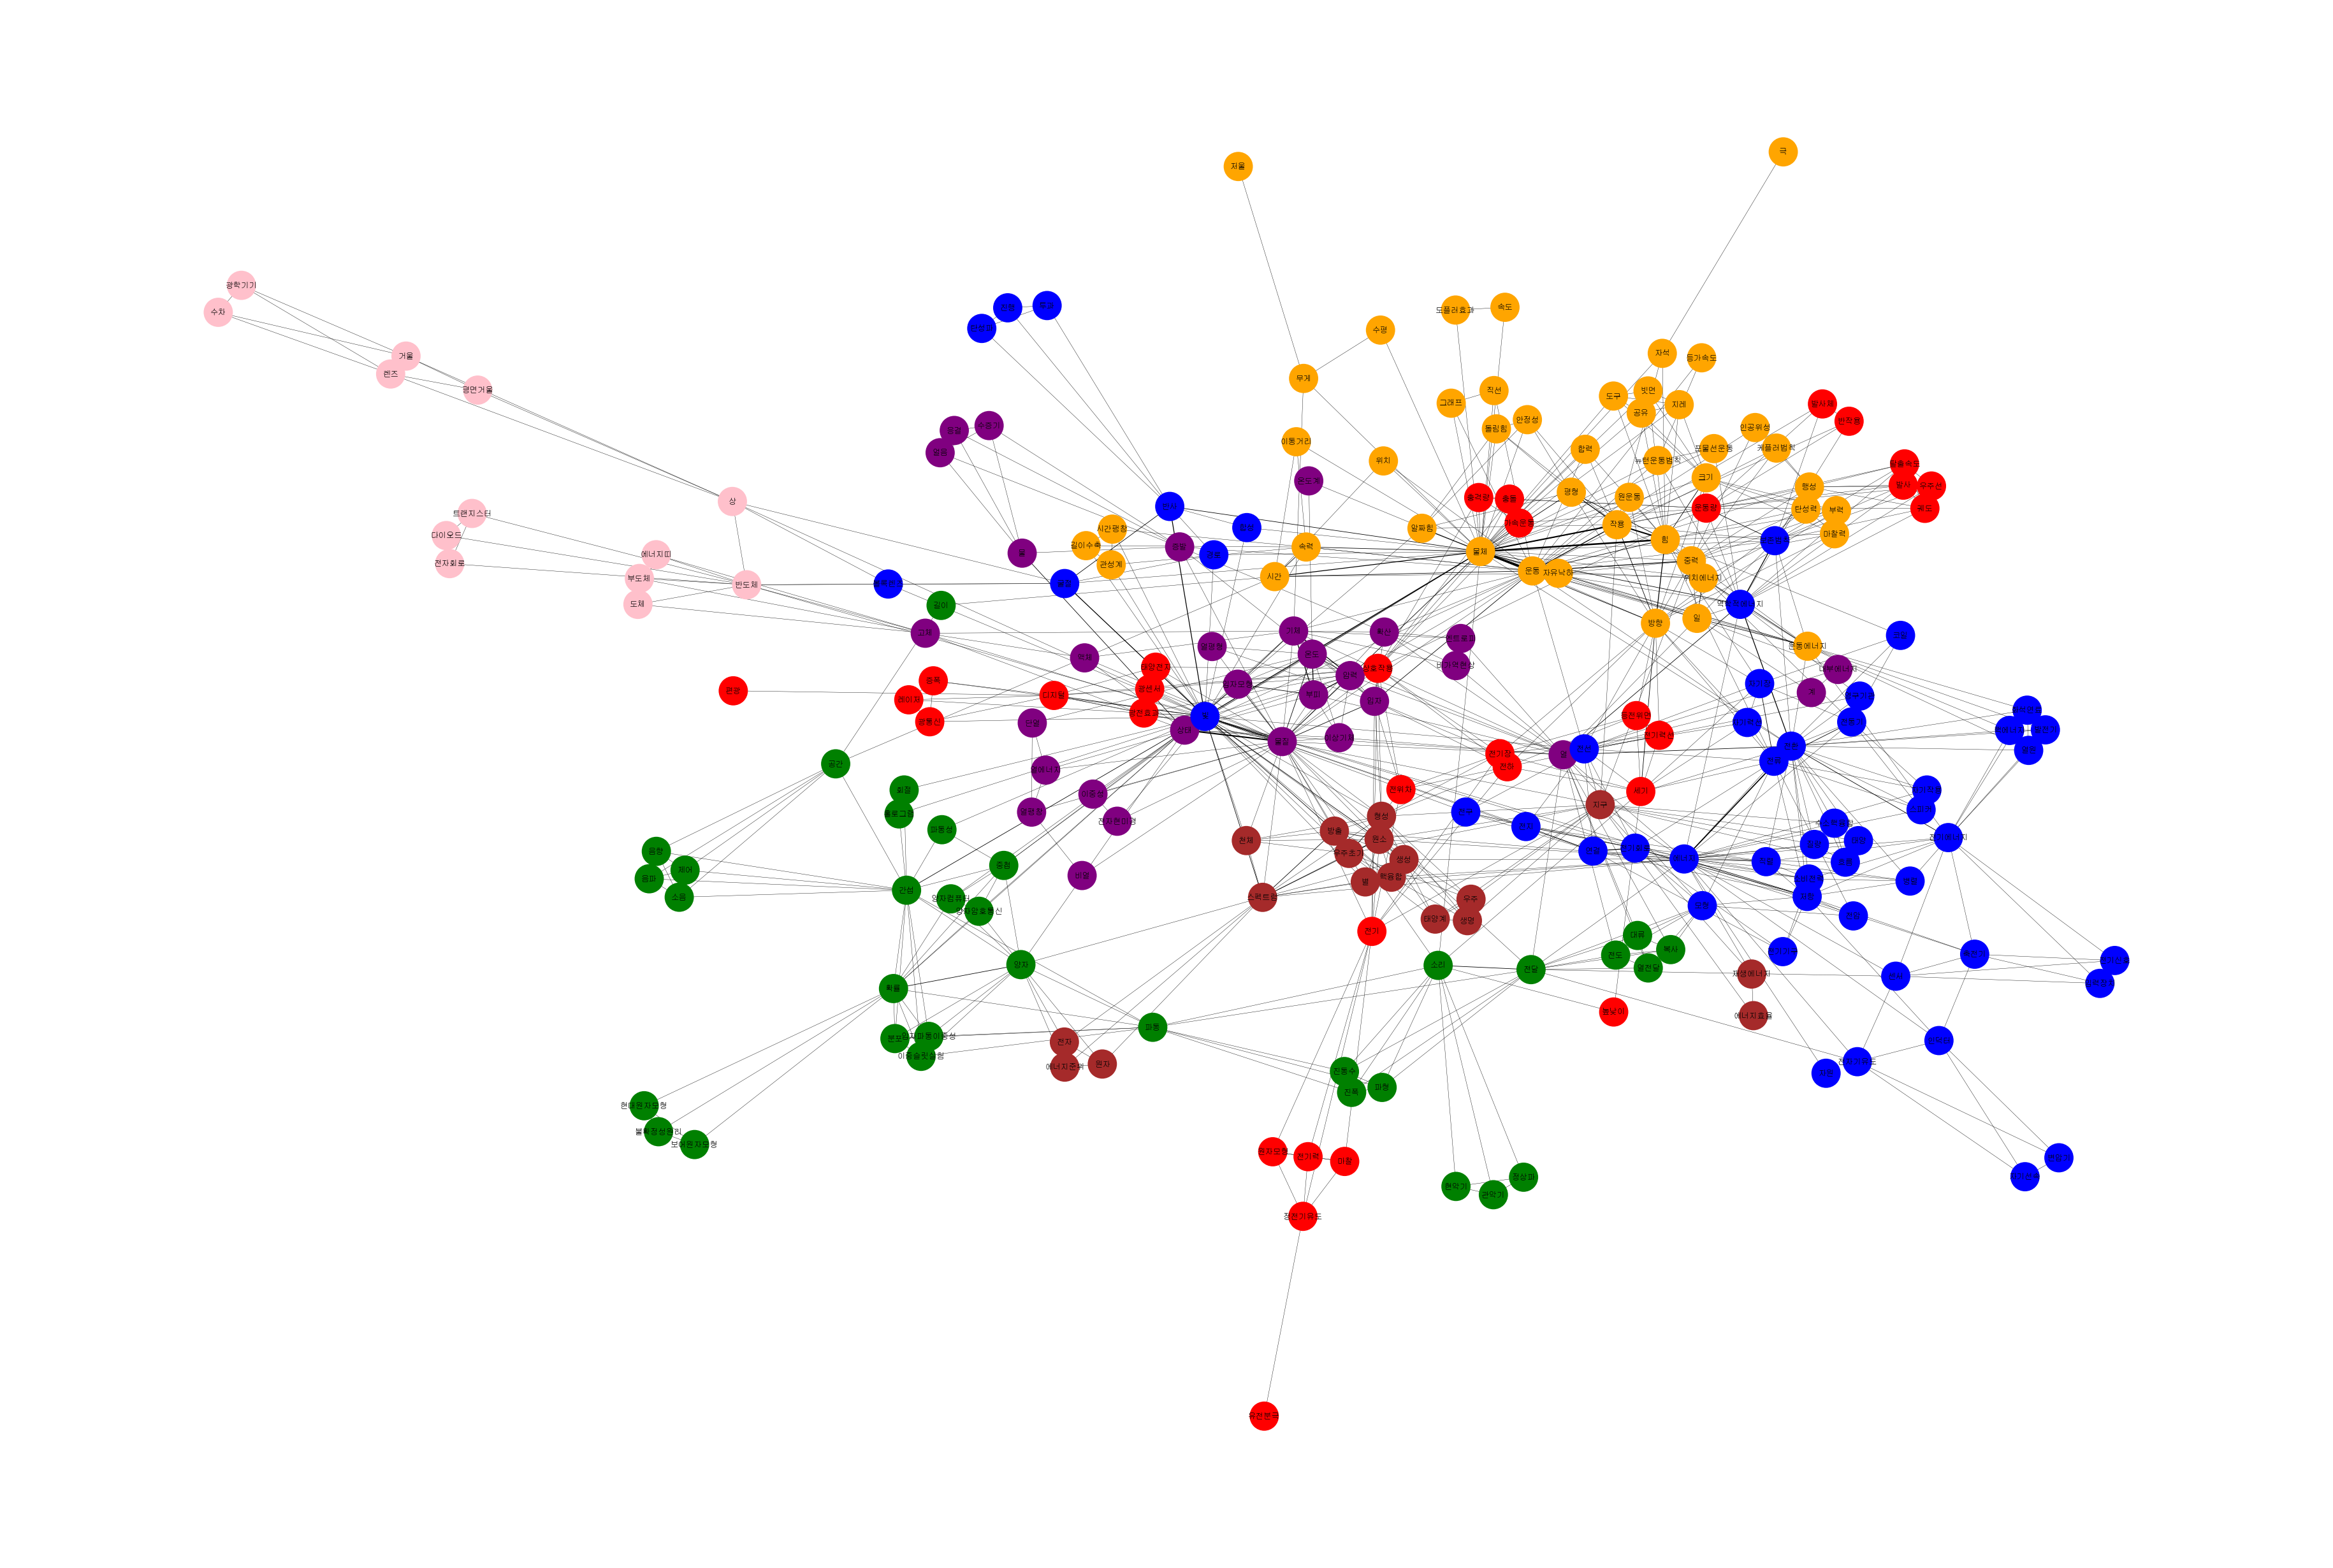

In [26]:
# 커뮤니티별로 색상 지정
colors = itertools.cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])  # 필요한 색상 리스트

node_colors = {}
for community, color in zip(communities_giant, colors):
    for node in community:
        node_colors[node] = color

# 노드 색상 리스트 생성
node_color_list = [node_colors[node] for node in G_giant.nodes()]

# 그래프 레이아웃 설정
pos = nx.fruchterman_reingold_layout(G_giant, k=1, iterations=1000, weight='weight')  # 그래프의 노드 위치 결정

edge_weights = {(u, v): data['weight'] for u, v, data in G_giant.edges(data=True)}
edge_width = [edge_weights[edge] * 0.1 for edge in G_giant.edges()]

# 그래프 시각화
plt.figure(figsize=(12,8), dpi=300)
nx.draw(G_giant, pos, with_labels=True, node_color=node_color_list, width=edge_width, node_size=100, font_family = font, font_size=3)
plt.show()

In [27]:
sum_matrix = np.zeros((7,7))

for i in range(7):
    for j in range(7):
        sum_comp = []
        for x in range(len(list(communities_giant[i]))):
            for y in range(len(list(communities_giant[j]))):
                s = list(communities_giant[i])[x]
                t = list(communities_giant[j])[y]
                sum_comp.append(nx.shortest_path_length(G_giant, source=s, target=t))
        sum_matrix[i][j] = np.average(sum_comp)

lst = []
for idx, data in enumerate(sum_matrix):
    # 제외할 인덱스
    index_to_exclude = idx
    # 새로운 리스트 생성 (index_to_exclude 인덱스를 제외한 리스트)
    filtered_data = [value for i, value in enumerate(data) if i != index_to_exclude]
    print(np.average(filtered_data))
    lst.append(np.average(filtered_data))

3.3047137417204113
3.2521607632740945
3.5045989763016707
3.386801946484651
3.1835904198635974
3.0902208675492986
3.9352537233771243


Text(0, 0.5, 'Average shortest path length')

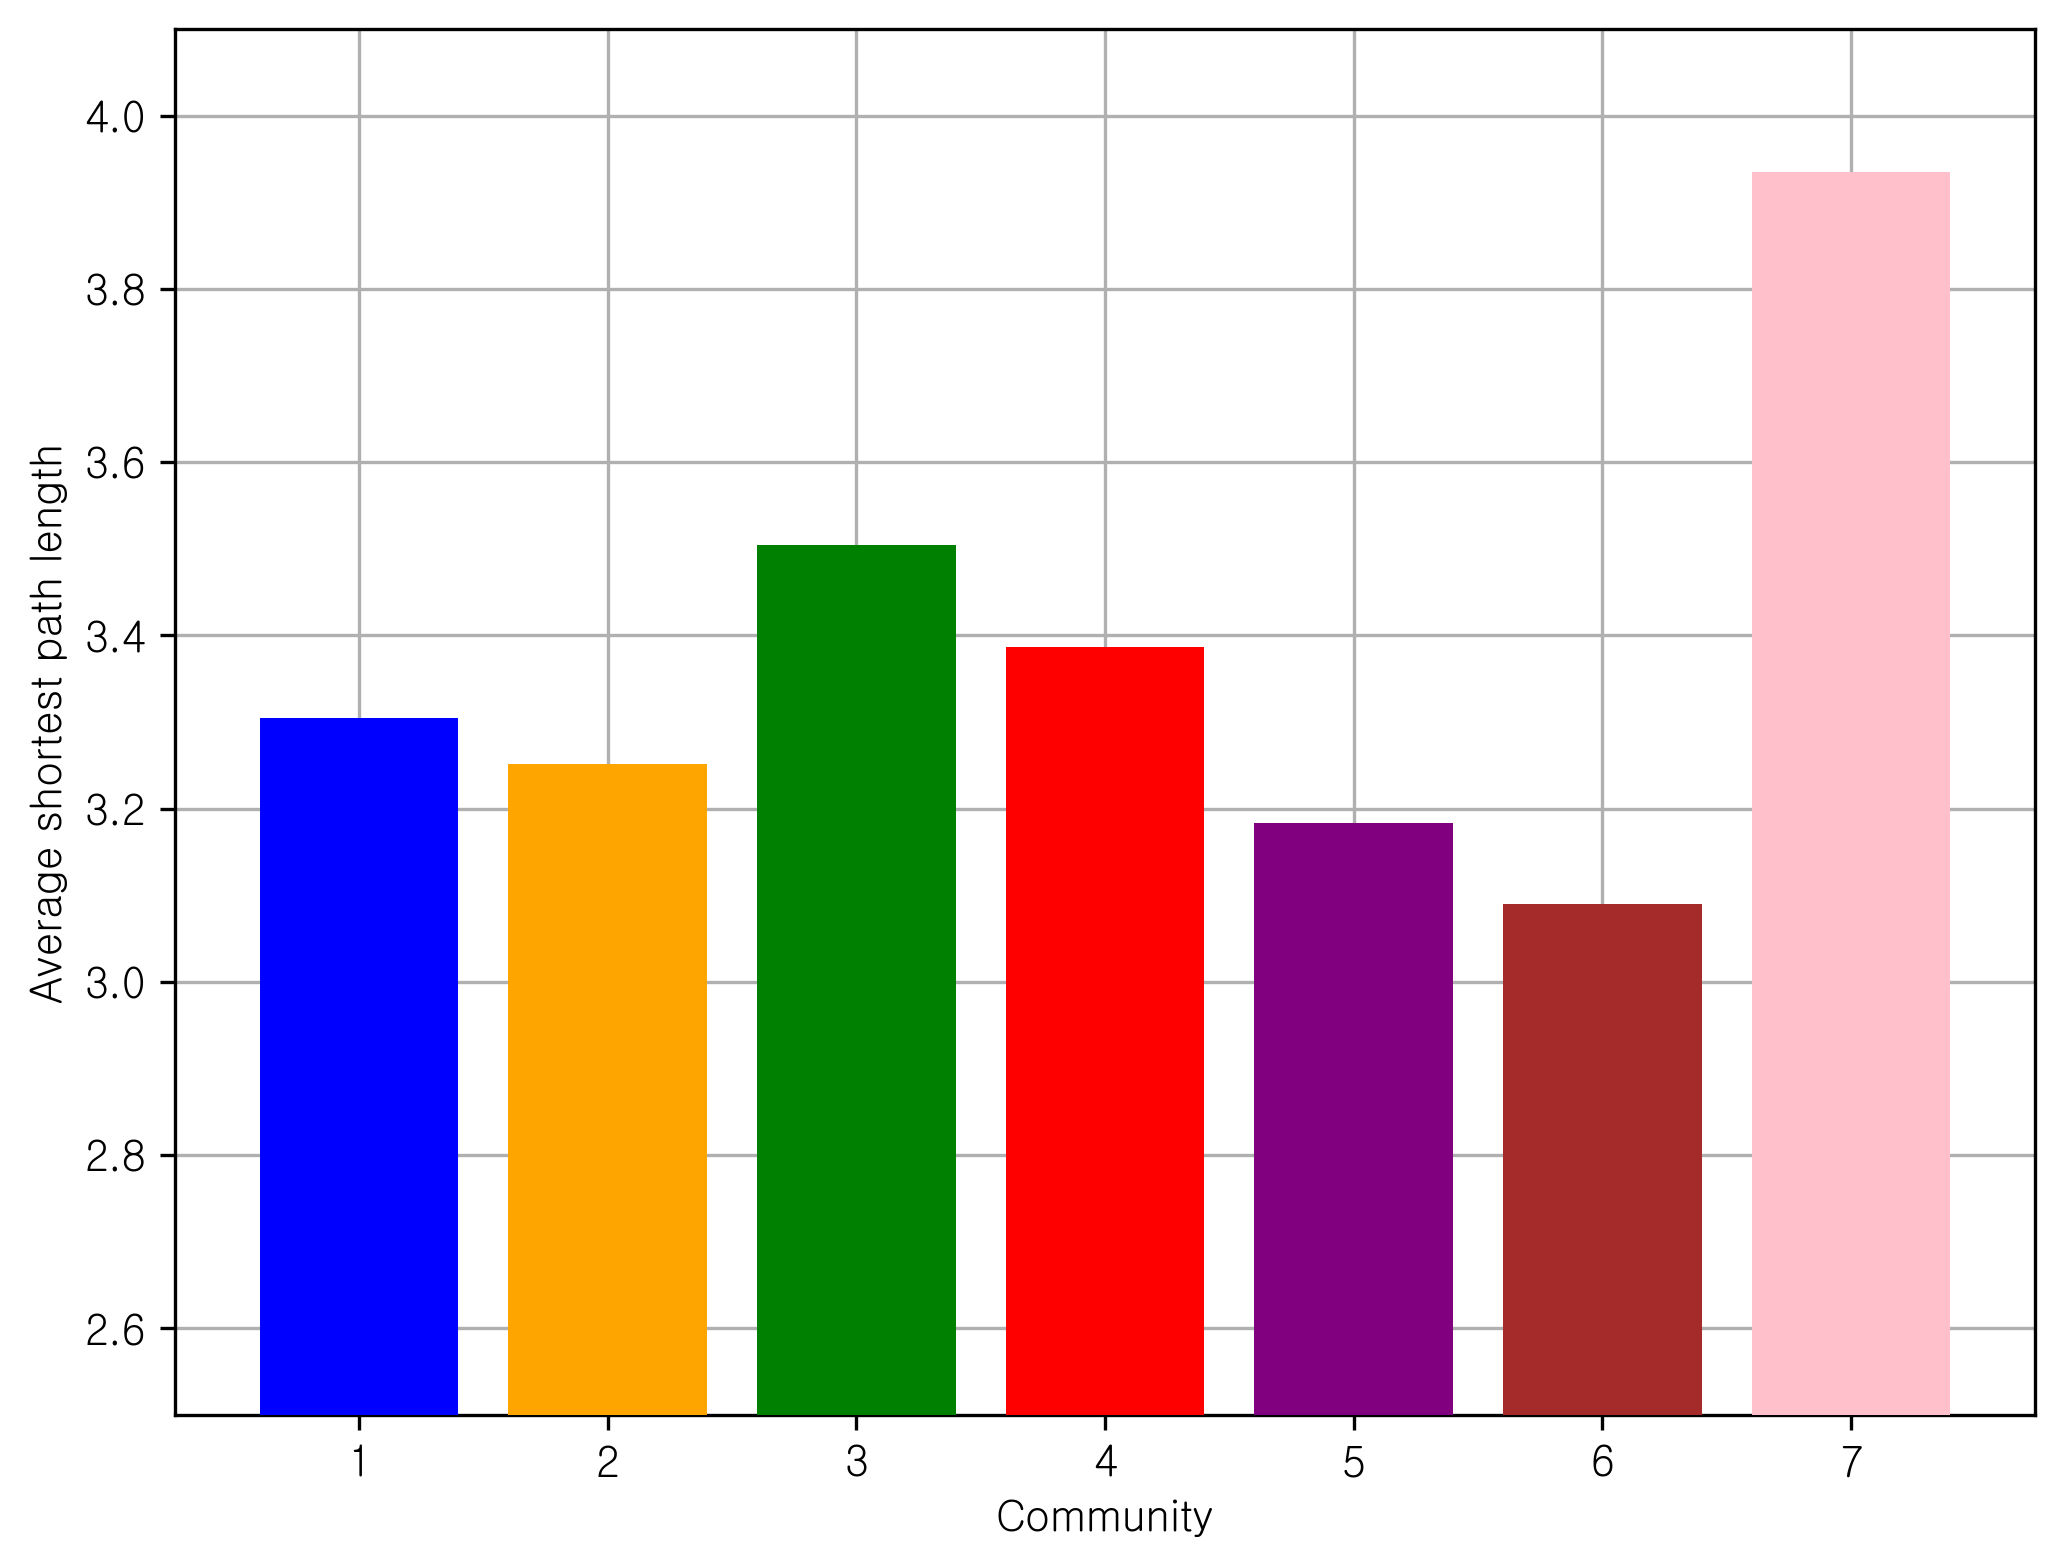

In [29]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# 그리드를 그리기 (zorder를 낮게 설정)
ax.grid(True, zorder=0)

# 막대 그래프 그리기 (zorder를 높게 설정)
x_labels = range(1, 8)
ax.bar(x_labels, lst, color=colors, zorder=3)
ax.set_xticks(x_labels)
ax.set_ylim(2.5, 4.1)

plt.xlabel('Community')
plt.ylabel('Average shortest path length')

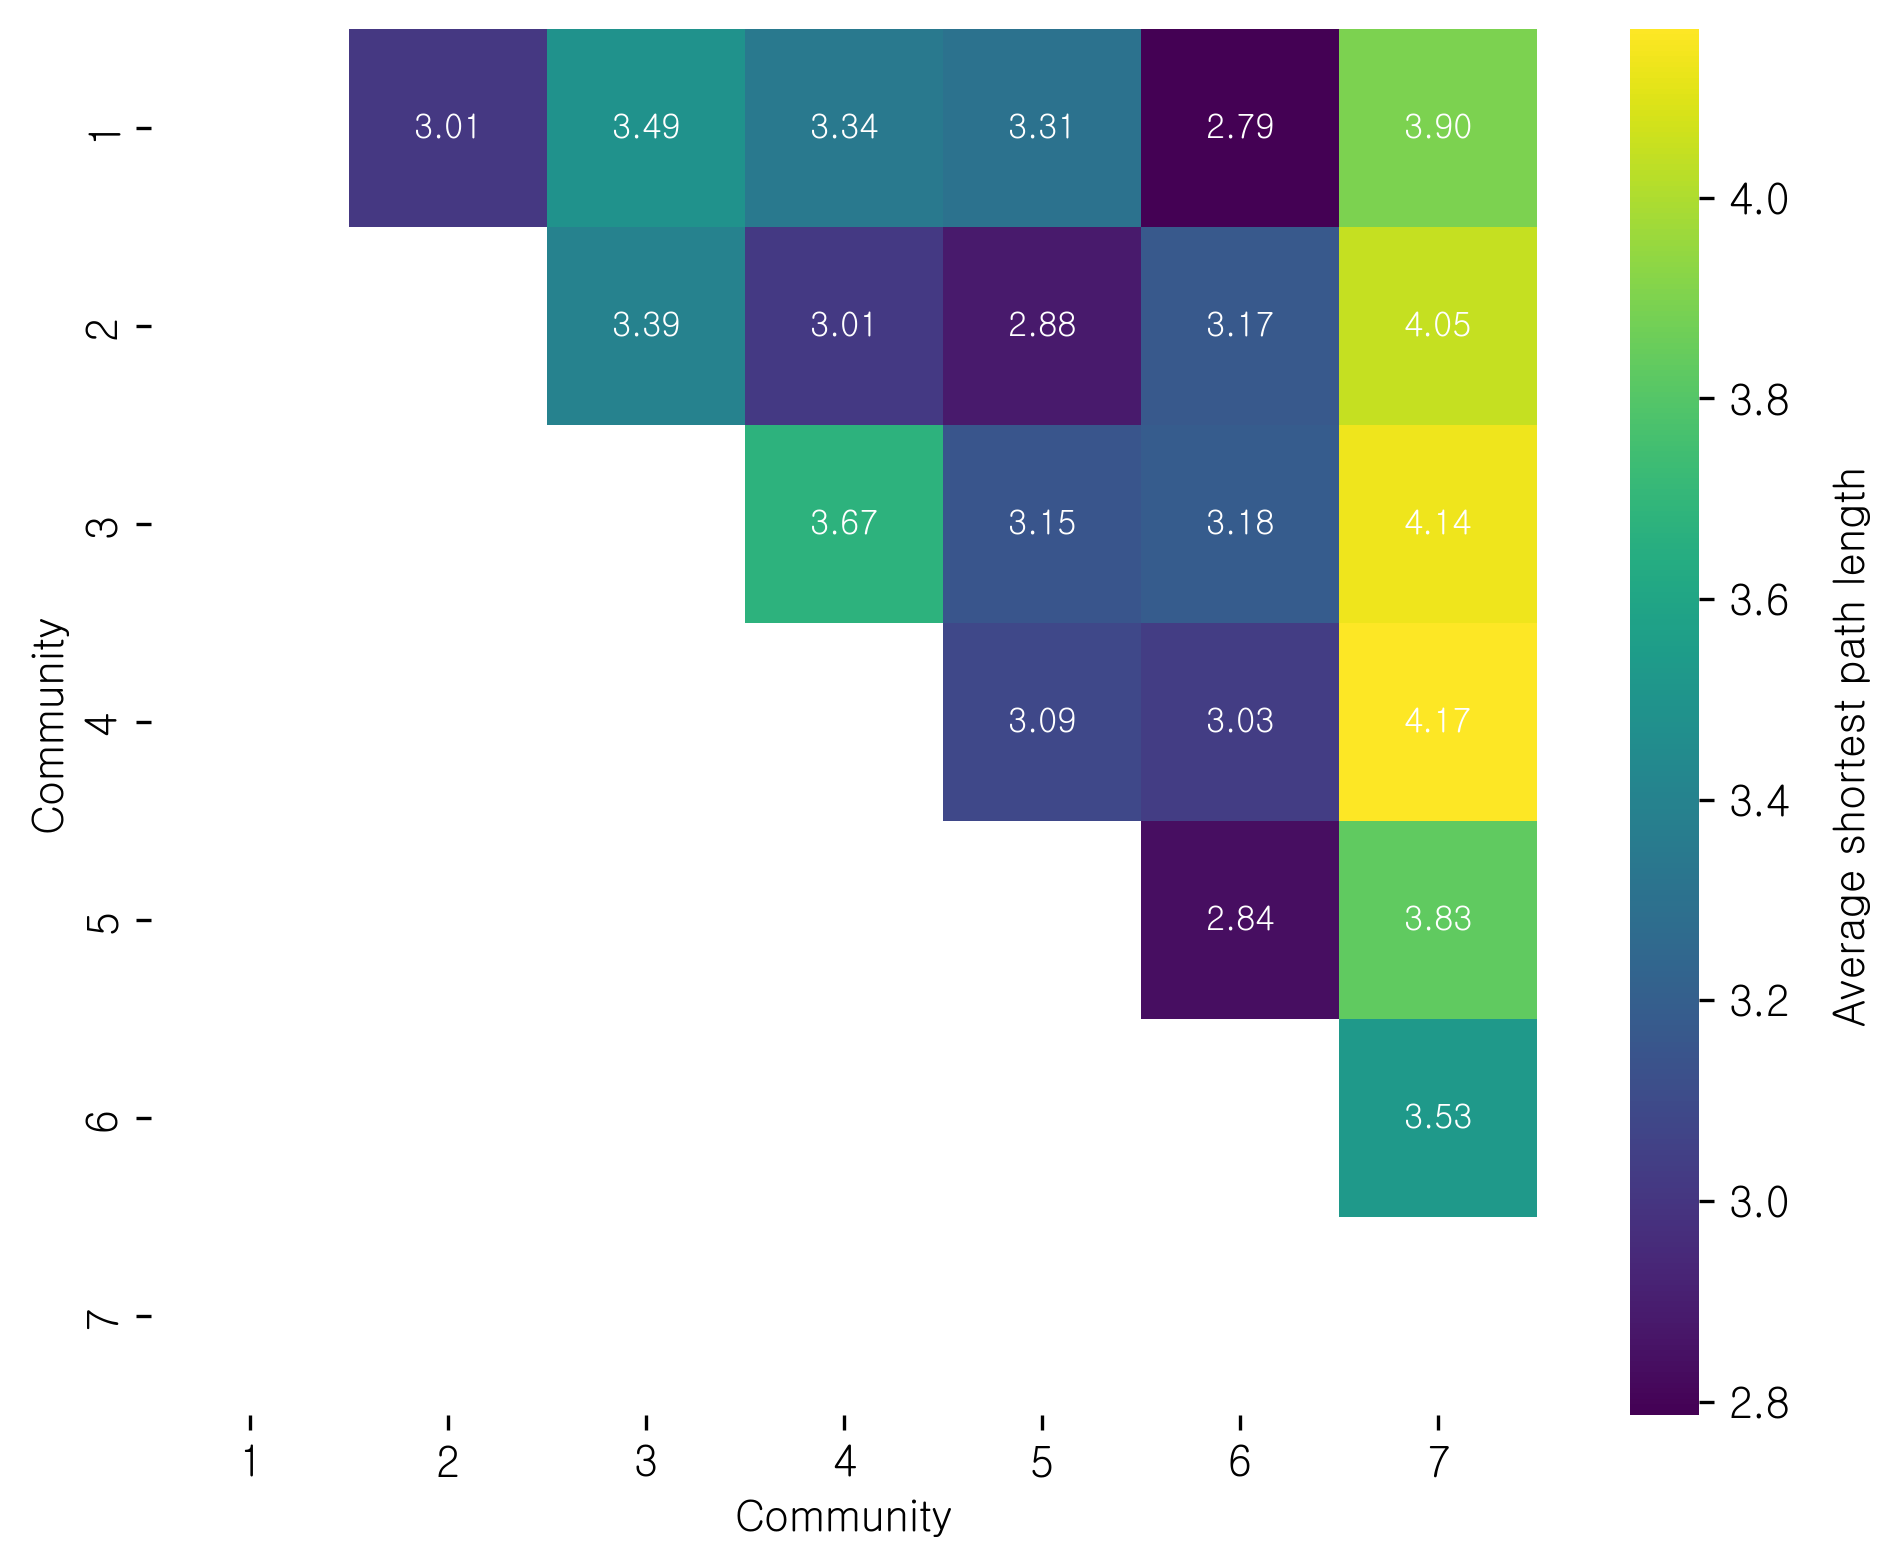

In [30]:
matrix = sum_matrix

# 좌하단 삼각형 부분만 남기고 나머지는 NaN으로 설정
mask = np.tri(*matrix.shape, k=-1).T
masked_matrix = np.where(mask, matrix, np.nan)
labels = np.arange(1, 8)

# 히트맵 그리기
plt.figure(figsize=(8, 6), dpi=300)
heatmap = sns.heatmap(masked_matrix, annot=False, fmt=".2f", cmap="viridis", cbar=True, square=True, xticklabels=labels, yticklabels=labels)

for i in range(masked_matrix.shape[0]):
    for j in range(masked_matrix.shape[1]):
        if not np.isnan(masked_matrix[i, j]):
            heatmap.text(j + 0.5, i + 0.5, f'{masked_matrix[i, j]:.2f}', 
                         ha='center', va='center', fontsize=8, color='white')

plt.xlabel('Community')
plt.ylabel('Community')

plt.text(8.5,5.0,'Average shortest path length', rotation=90)

plt.show()

# 2. 개별 교과(목) 네트워크

## 초3-6

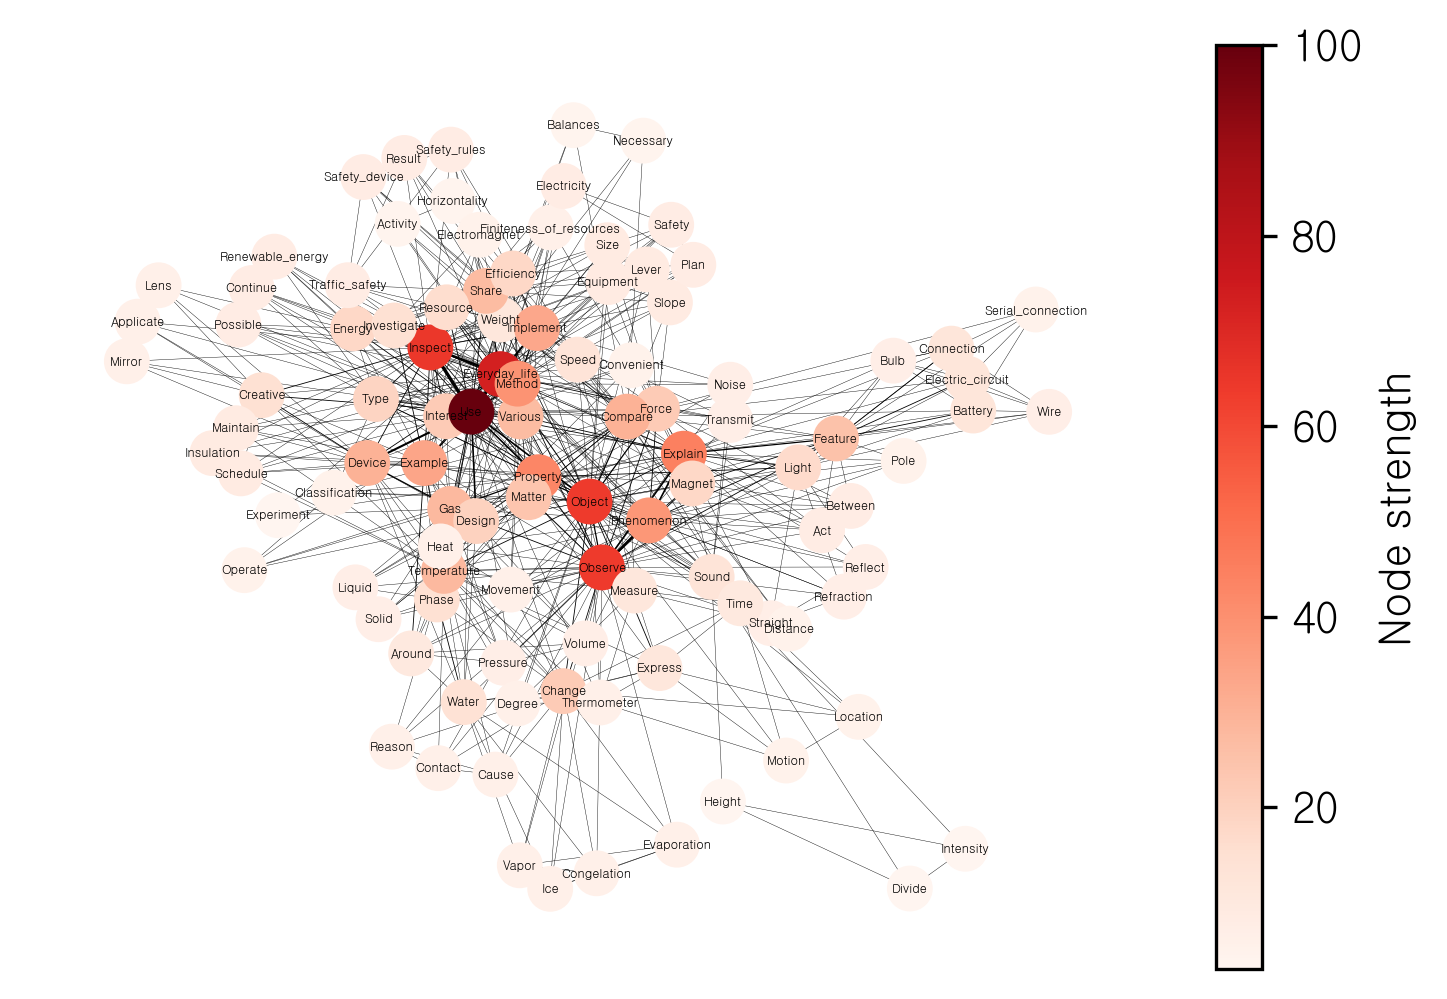

In [22]:
subject_graph(200, 1, 1.5, file_lst[0])

In [23]:
G = graph(file_lst[0])

Number of nodes: 105
Number of edges: 637
Degree avg: 12.13, Degree std: 10.06
EdgeWeight avg: 1.24, EdgeWeight std: 0.69
NodeWeight avg: 15.07, NodeWeight std: 16.24


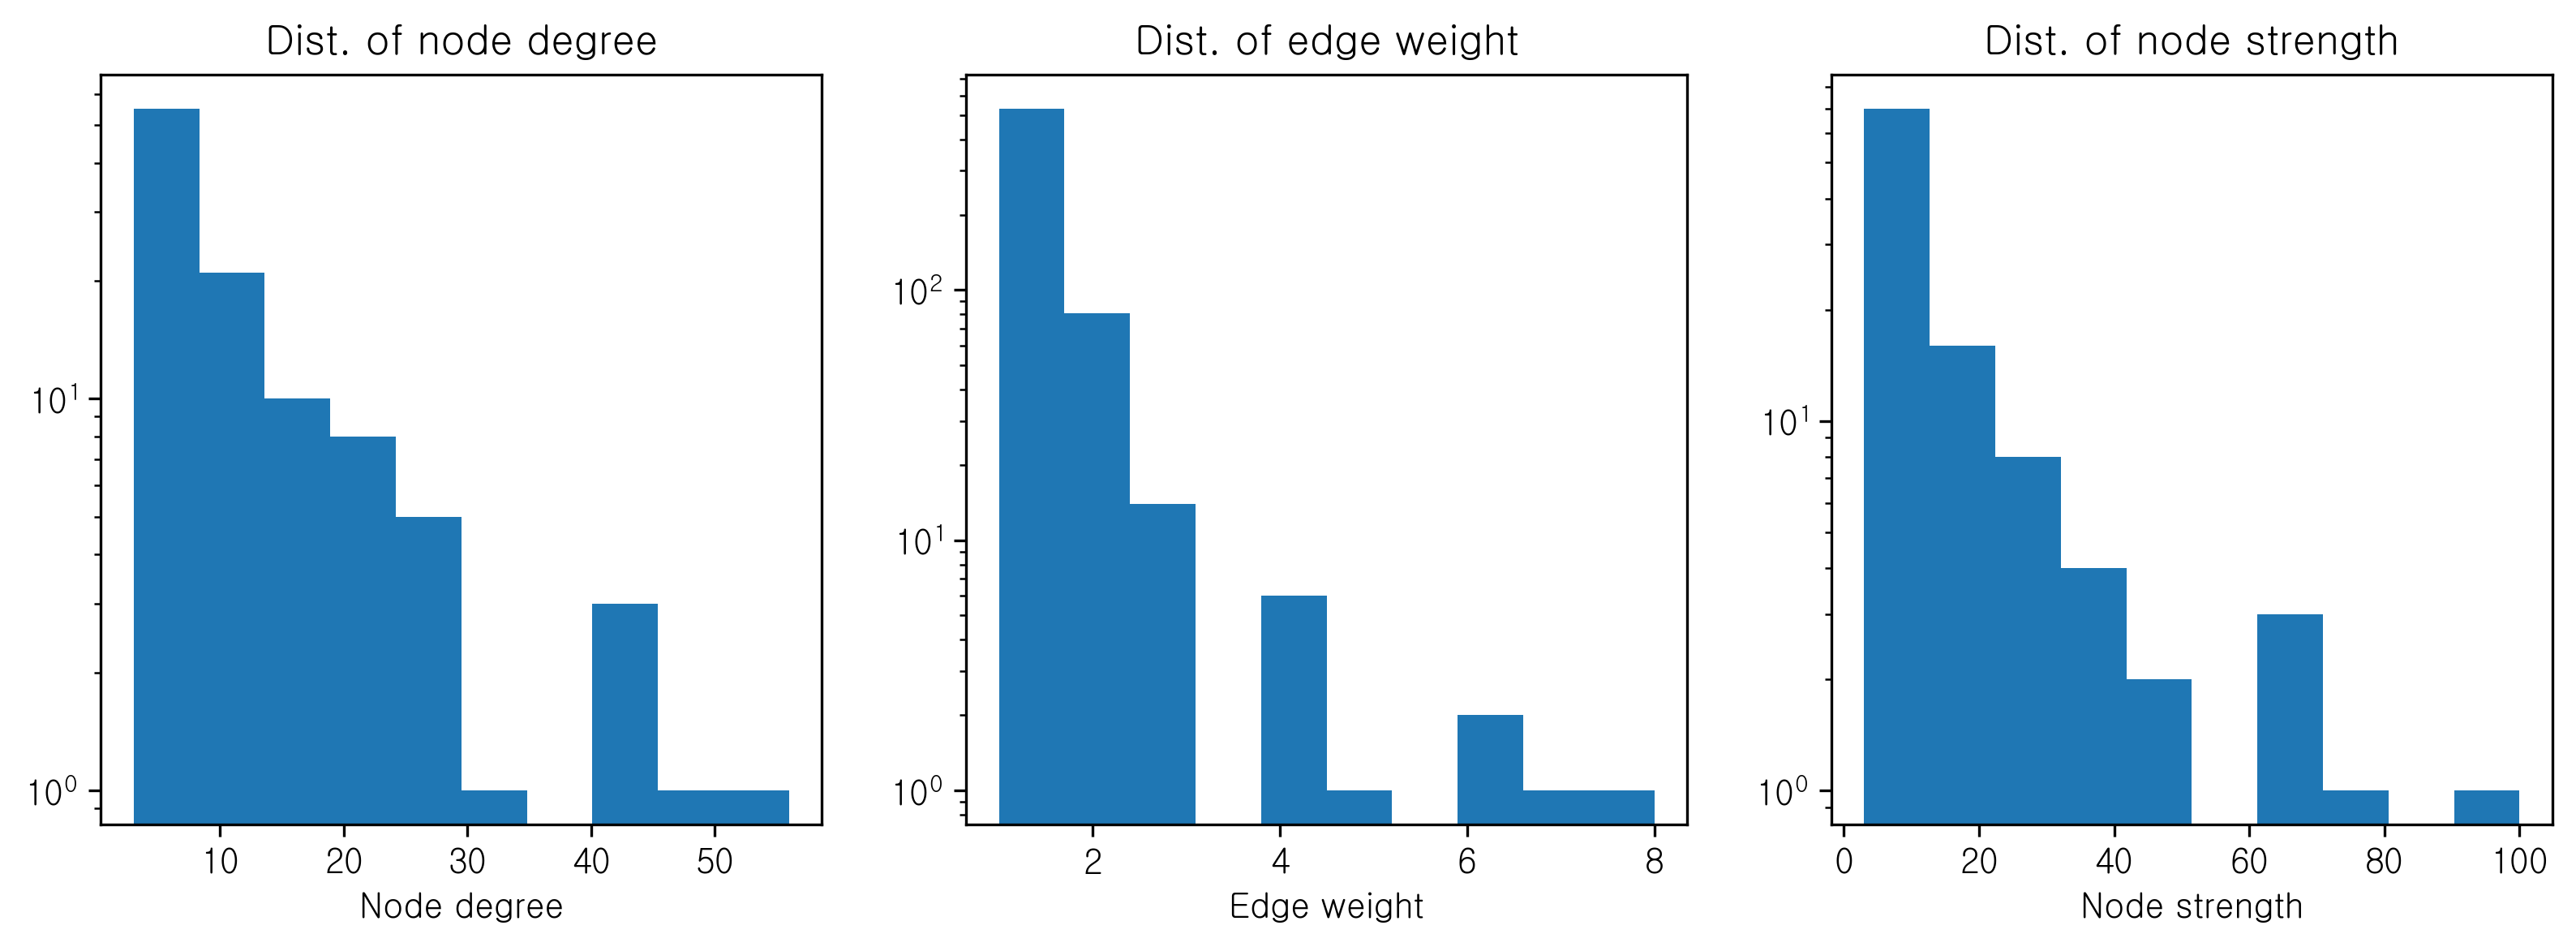

In [24]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [25]:
df = info(G)
df.head(20)

Node_ND  Node Degree                        Edge  Edge Weight  \
0             Use         56.0              (Use, Inspect)            8   
1   Everyday_life         46.0        (Everyday_life, Use)            7   
2         Observe         44.0    (Everyday_life, Inspect)            6   
3         Inspect         44.0       (Phenomenon, Observe)            6   
4          Object         43.0               (Use, Device)            5   
5         Explain         32.0  (Everyday_life, Implement)            4   
6          Method         28.0       (Phenomenon, Explain)            4   
7        Property         27.0               (Object, Use)            4   
8         Example         27.0          (Observe, Explain)            4   
9      Phenomenon         26.0               (Use, Design)            4   
10        Compare         25.0             (Use, Property)            4   
11            Gas         24.0             (Force, Object)            3   
12      Implement         24.0      (Everyday_life, Share)            3   
13    Temperature         24.0     (Everyday_life, Method)            3   
14          Share         22.0           (Object, Observe)            3   
15        Various         21.0           (Object, Compare)            3   
16         Device         21.0          (Object, Property)            3   
17         Matter         19.0              (Use, Various)            3   
18         Change         19.0              (Use, Example)            3   
19          Force         17.0               (Use, Method)            3   

          Node_NS  Node Strength        Node_BC  Betweenness Centrality  
0             Use          100.0            Use                0.217404  
1   Everyday_life           73.0         Object                0.185977  
2         Inspect           65.0        Observe                0.180783  
3          Object           64.0  Everyday_life                0.140524  
4         Observe           64.0        Inspect                0.131860  
5         Explain           45.0        Explain                0.123765  
6        Property           43.0        Compare                0.109377  
7          Method           39.0       Property                0.092532  
8      Phenomenon           38.0     Phenomenon                0.082280  
9         Example           34.0         Method                0.080676  
10      Implement           33.0         Change                0.077649  
11        Compare           30.0    Temperature                0.077290  
12         Device           30.0          Sound                0.074272  
13            Gas           28.0        Example                0.070495  
14    Temperature           28.0      Implement                0.067423  
15          Share           27.0         Device                0.066295  
16        Various           27.0        Feature                0.065910  
17        Feature           25.0            Gas                0.064836  
18         Matter           24.0         Matter                0.054934  
19          Force           22.0          Share                0.050951

## 중1-3

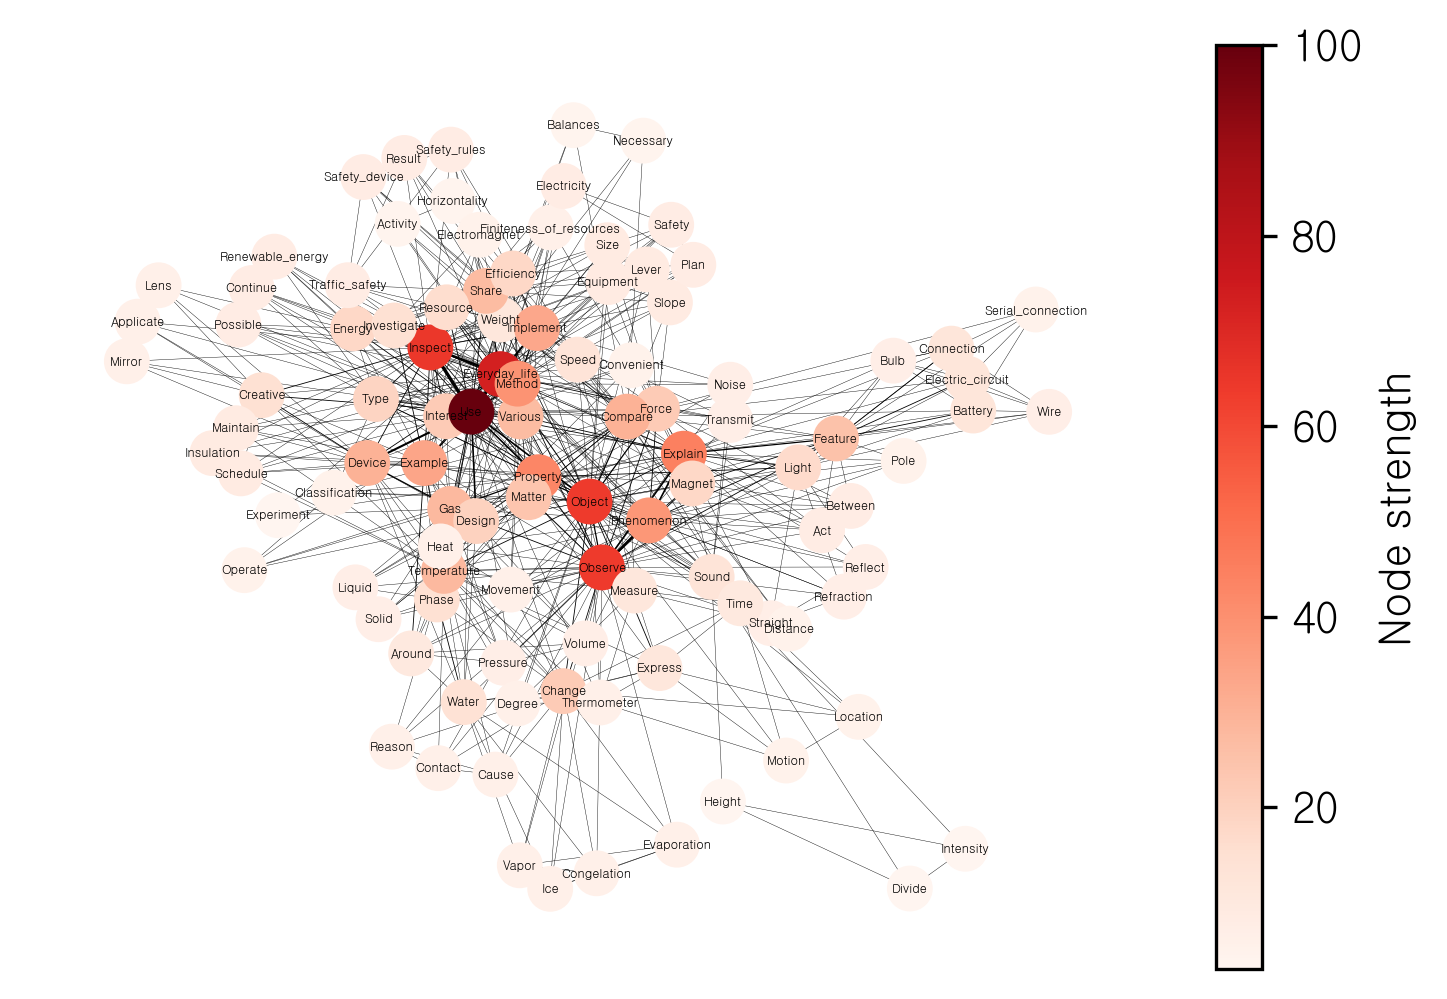

In [26]:
subject_graph(200, 1, 1.5, file_lst[0])

In [27]:
G = graph(file_lst[0])

Number of nodes: 105
Number of edges: 637
Degree avg: 12.13, Degree std: 10.06
EdgeWeight avg: 1.24, EdgeWeight std: 0.69
NodeWeight avg: 15.07, NodeWeight std: 16.24


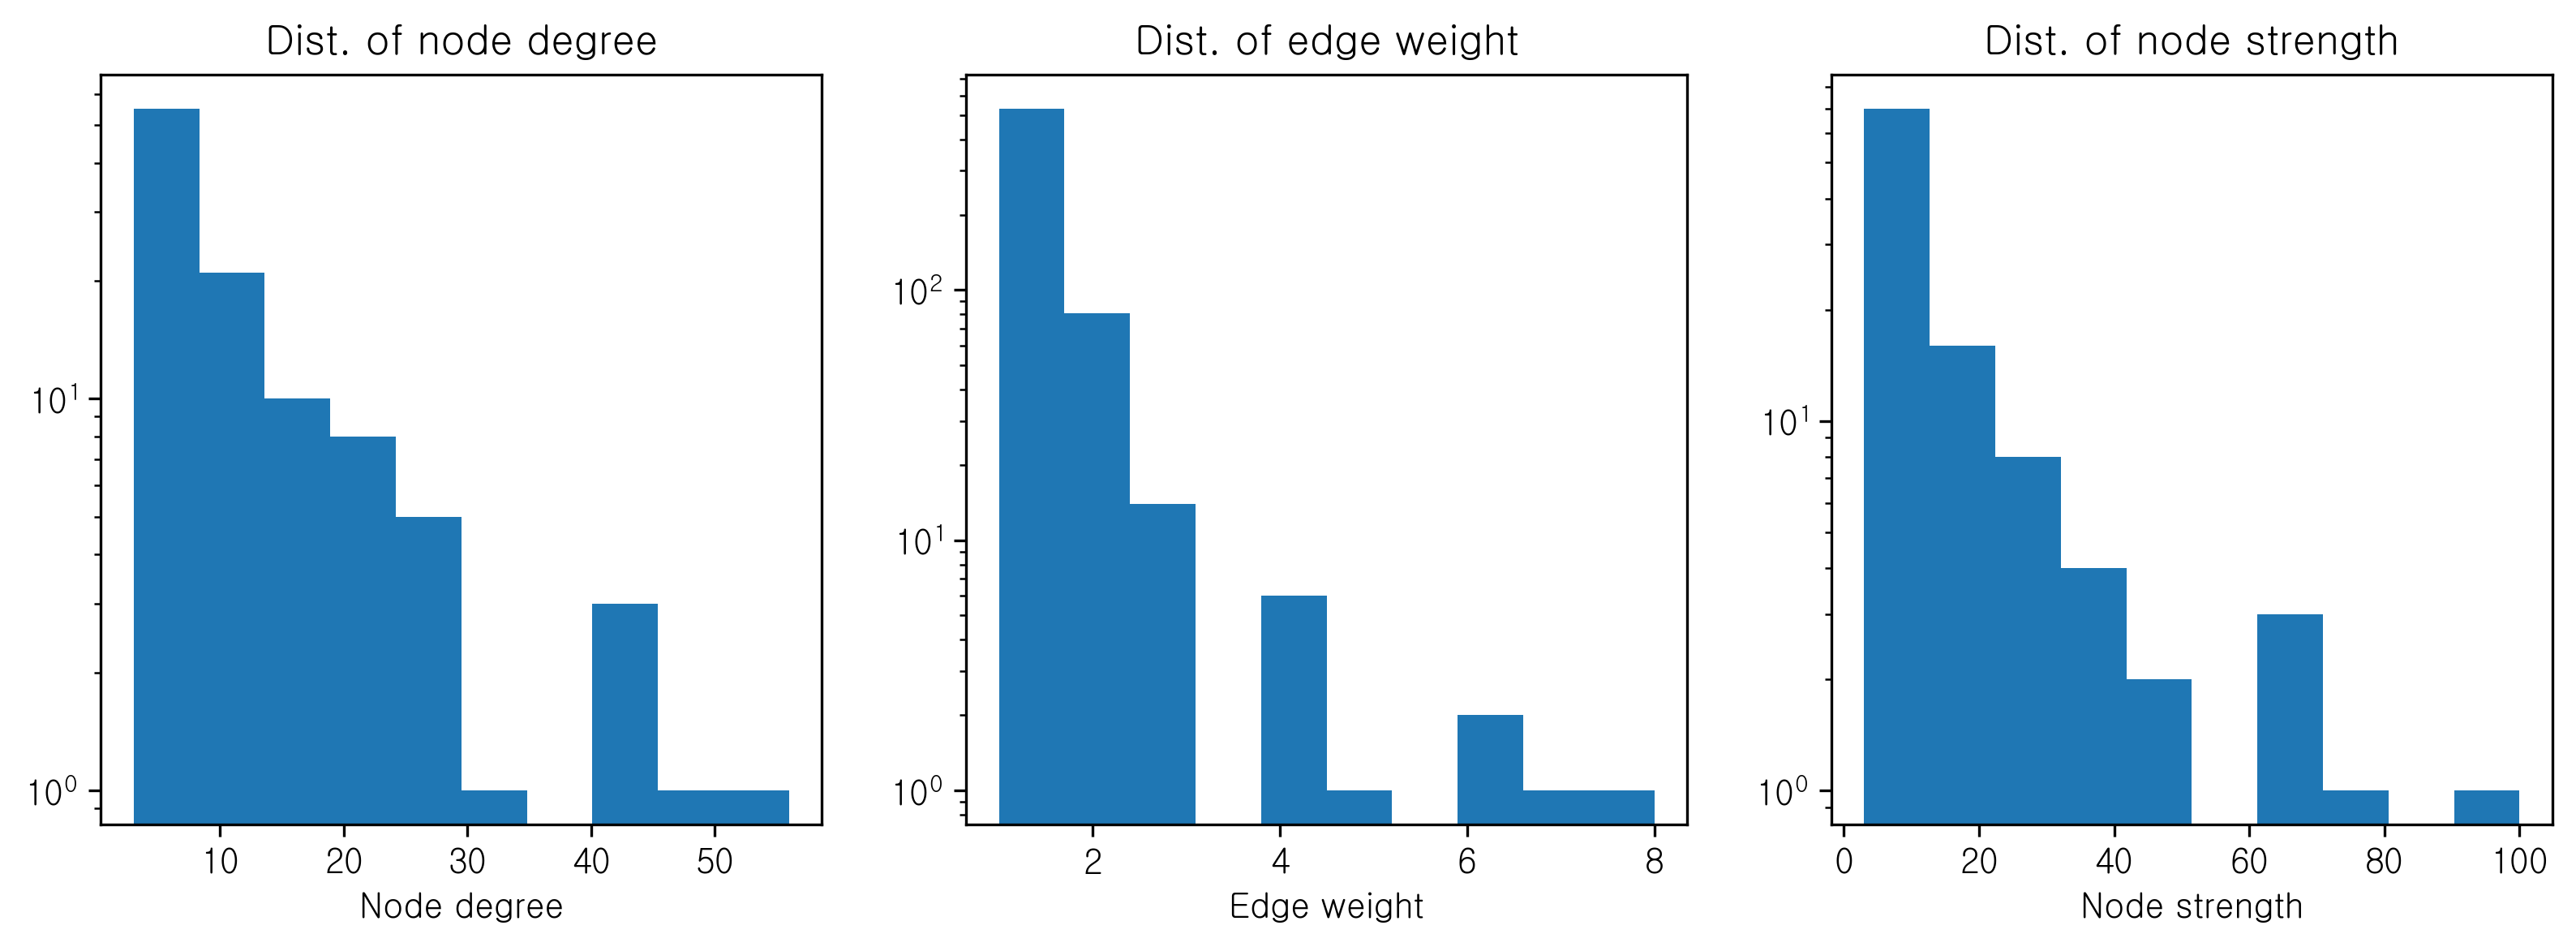

In [28]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [29]:
df = info(G)
df.head(20)

Node_ND  Node Degree                        Edge  Edge Weight  \
0             Use         56.0              (Use, Inspect)            8   
1   Everyday_life         46.0        (Everyday_life, Use)            7   
2         Observe         44.0    (Everyday_life, Inspect)            6   
3         Inspect         44.0       (Phenomenon, Observe)            6   
4          Object         43.0               (Use, Device)            5   
5         Explain         32.0  (Everyday_life, Implement)            4   
6          Method         28.0       (Phenomenon, Explain)            4   
7        Property         27.0               (Object, Use)            4   
8         Example         27.0          (Observe, Explain)            4   
9      Phenomenon         26.0               (Use, Design)            4   
10        Compare         25.0             (Use, Property)            4   
11            Gas         24.0             (Force, Object)            3   
12      Implement         24.0      (Everyday_life, Share)            3   
13    Temperature         24.0     (Everyday_life, Method)            3   
14          Share         22.0           (Object, Observe)            3   
15        Various         21.0           (Object, Compare)            3   
16         Device         21.0          (Object, Property)            3   
17         Matter         19.0              (Use, Various)            3   
18         Change         19.0              (Use, Example)            3   
19          Force         17.0               (Use, Method)            3   

          Node_NS  Node Strength        Node_BC  Betweenness Centrality  
0             Use          100.0            Use                0.217404  
1   Everyday_life           73.0         Object                0.185977  
2         Inspect           65.0        Observe                0.180783  
3          Object           64.0  Everyday_life                0.140524  
4         Observe           64.0        Inspect                0.131860  
5         Explain           45.0        Explain                0.123765  
6        Property           43.0        Compare                0.109377  
7          Method           39.0       Property                0.092532  
8      Phenomenon           38.0     Phenomenon                0.082280  
9         Example           34.0         Method                0.080676  
10      Implement           33.0         Change                0.077649  
11        Compare           30.0    Temperature                0.077290  
12         Device           30.0          Sound                0.074272  
13            Gas           28.0        Example                0.070495  
14    Temperature           28.0      Implement                0.067423  
15          Share           27.0         Device                0.066295  
16        Various           27.0        Feature                0.065910  
17        Feature           25.0            Gas                0.064836  
18         Matter           24.0         Matter                0.054934  
19          Force           22.0          Share                0.050951

## 통합과학

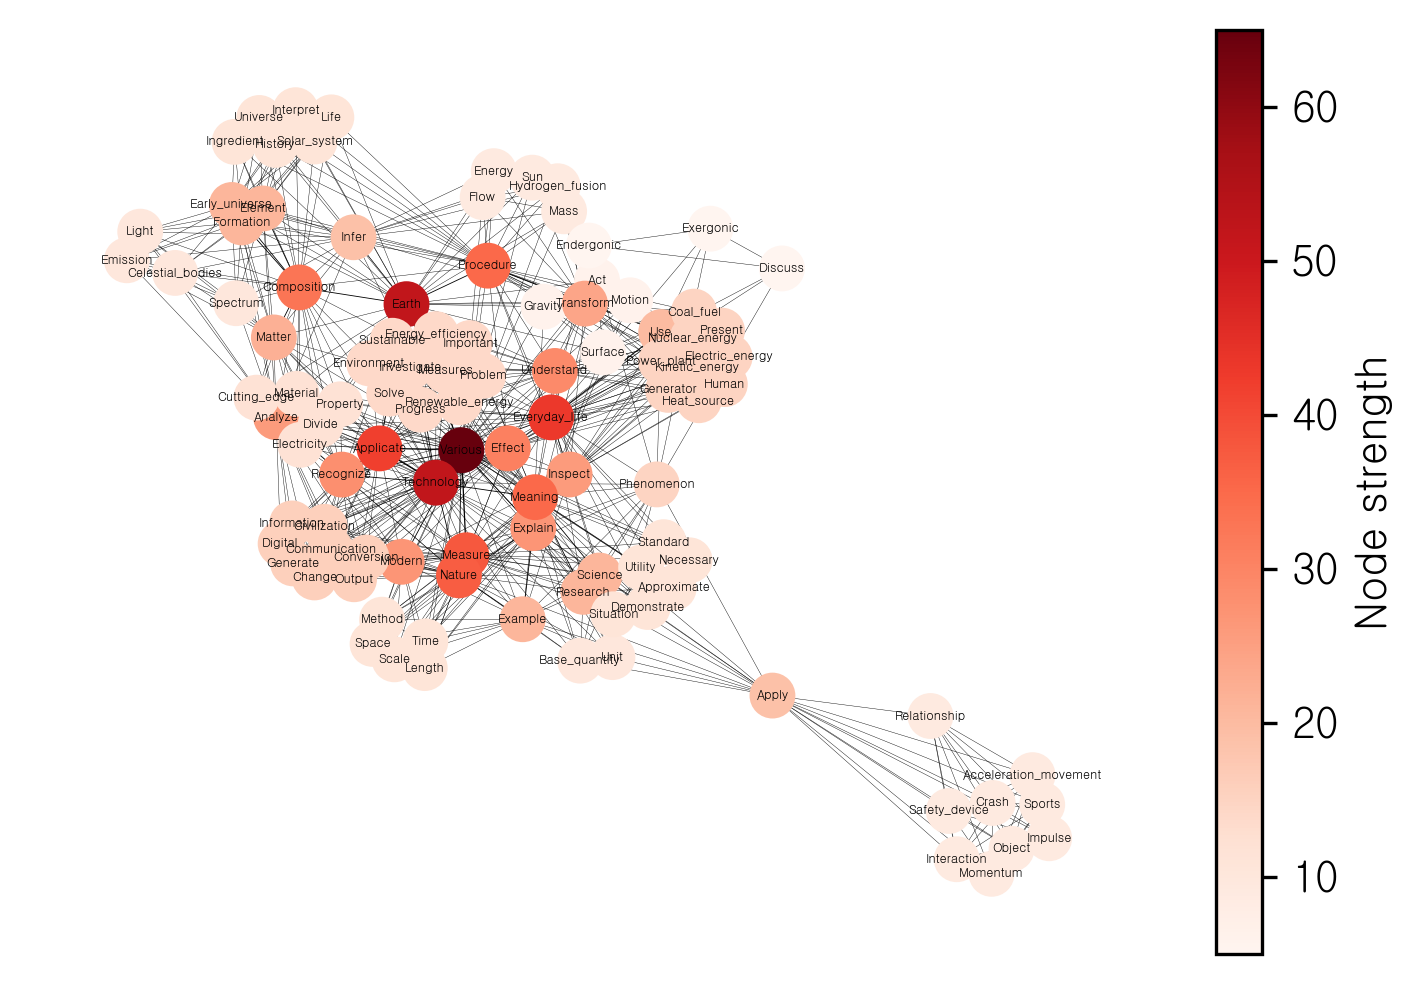

In [30]:
subject_graph(220,51, 1.5, file_lst[2])

In [31]:
G = graph(file_lst[2])

Number of nodes: 105
Number of edges: 834
Degree avg: 15.89, Degree std: 9.08
EdgeWeight avg: 1.05, EdgeWeight std: 0.23
NodeWeight avg: 16.63, NodeWeight std: 10.59


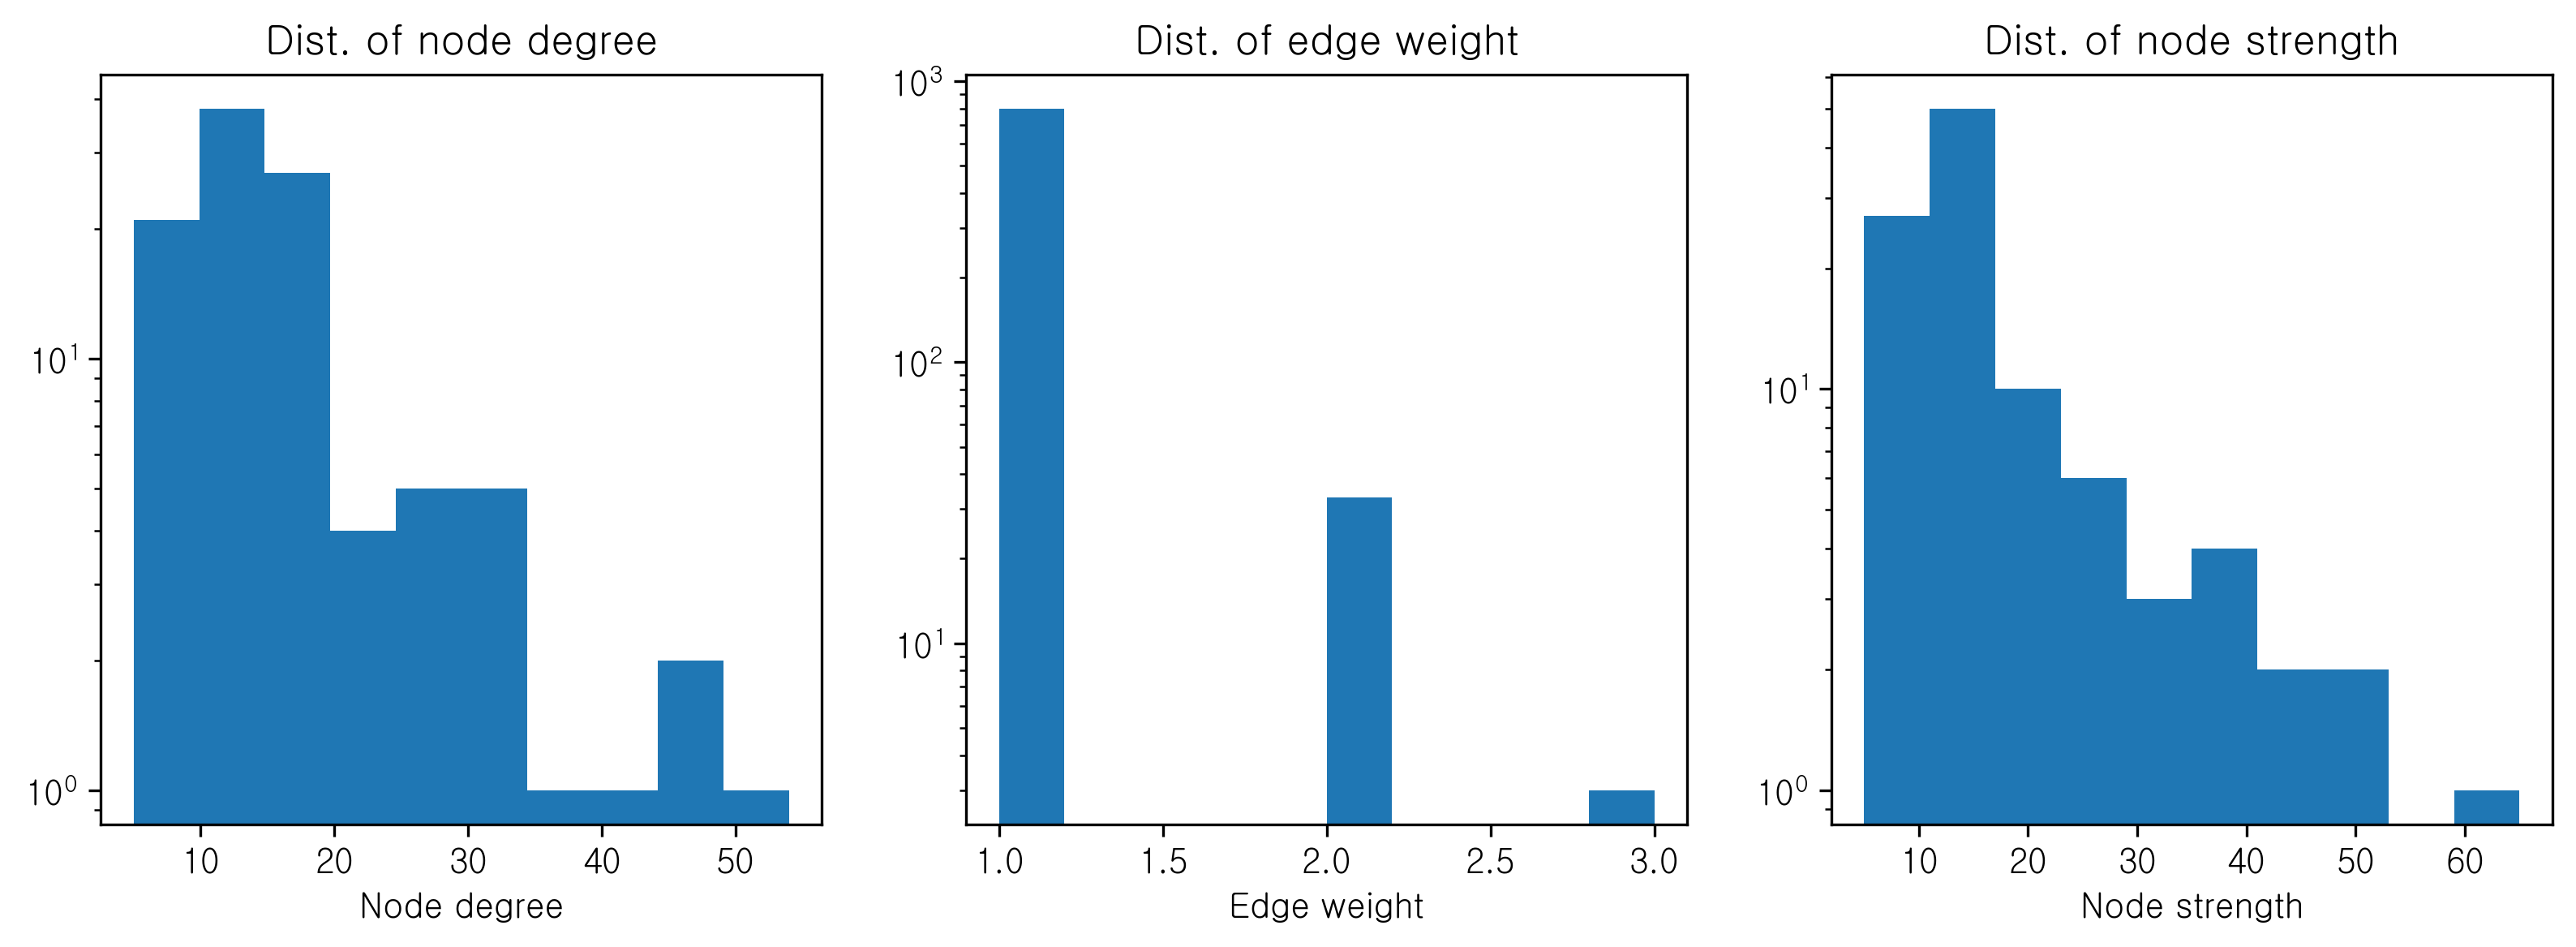

In [32]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [33]:
df = info(G)
df.head(20)

Node_ND  Node Degree                      Edge  Edge Weight  \
0         Various         54.0        (Various, Measure)            3   
1           Earth         46.0          (Various, Earth)            3   
2      Technology         45.0   (Technology, Applicate)            3   
3   Everyday_life         41.0         (Various, Nature)            2   
4       Applicate         37.0         (Various, Modern)            2   
5         Measure         34.0        (Various, Explain)            2   
6       Procedure         33.0  (Various, Everyday_life)            2   
7         Meaning         32.0     (Various, Technology)            2   
8          Nature         31.0      (Various, Applicate)            2   
9          Effect         31.0      (Various, Recognize)            2   
10     Understand         29.0         (Measure, Nature)            2   
11    Composition         28.0         (Measure, Modern)            2   
12        Inspect         26.0         (Example, Nature)            2   
13        Analyze         26.0        (Example, Explain)            2   
14      Recognize         25.0          (Nature, Modern)            2   
15         Modern         24.0         (Nature, Explain)            2   
16        Explain         24.0      (Nature, Technology)            2   
17      Transform         23.0     (Technology, Meaning)            2   
18         Matter         21.0   (Technology, Recognize)            2   
19        Example         19.0       (Technology, Earth)            2   

          Node_NS  Node Strength        Node_BC  Betweenness Centrality  
0         Various           65.0        Various                0.178566  
1      Technology           52.0          Apply                0.174896  
2           Earth           52.0          Earth                0.170978  
3   Everyday_life           43.0     Technology                0.139082  
4       Applicate           42.0  Everyday_life                0.135013  
5         Measure           38.0      Procedure                0.109882  
6          Nature           37.0        Meaning                0.106438  
7         Meaning           35.0      Applicate                0.094342  
8       Procedure           35.0         Nature                0.090540  
9     Composition           33.0        Explain                0.085448  
10         Effect           31.0        Measure                0.083755  
11     Understand           29.0    Composition                0.080416  
12      Recognize           28.0     Understand                0.077222  
13         Modern           27.0         Effect                0.073442  
14        Explain           27.0        Analyze                0.072762  
15        Inspect           26.0        Inspect                0.069208  
16        Analyze           26.0      Transform                0.059695  
17      Transform           24.0     Phenomenon                0.058557  
18         Matter           22.0        Example                0.055008  
19        Example           21.0        Science                0.053681

## 물리학

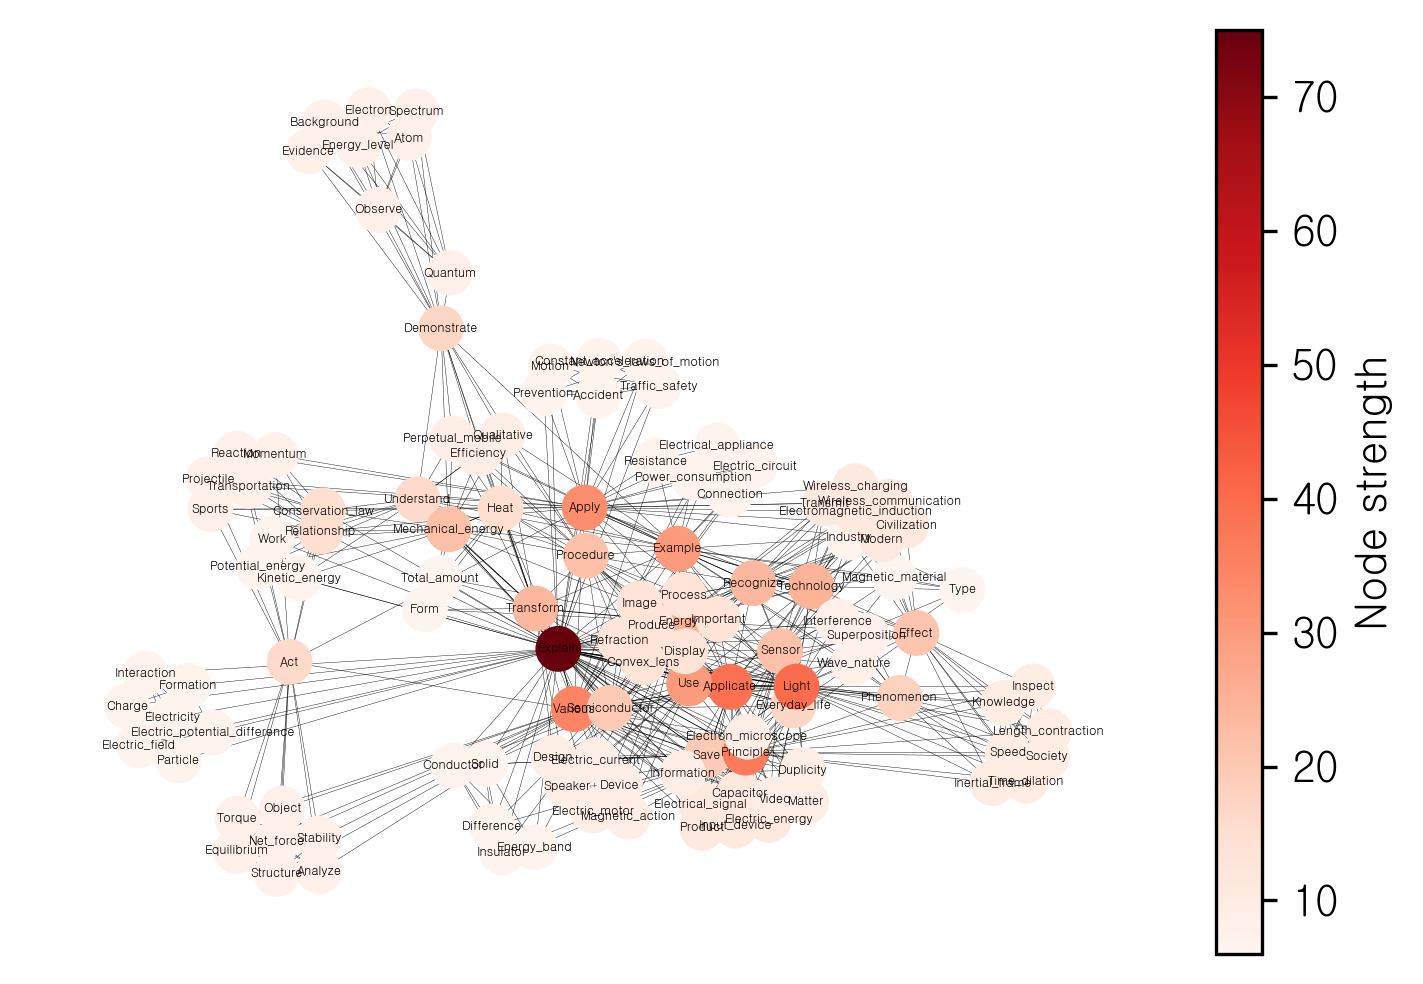

In [34]:
#(itr, seed, k, file_name)
subject_graph(220,51, 1.5, file_lst[3])

In [35]:
G = graph(file_lst[3])

Number of nodes: 119
Number of edges: 715
Degree avg: 12.02, Degree std: 8.27
EdgeWeight avg: 1.03, EdgeWeight std: 0.2
NodeWeight avg: 12.42, NodeWeight std: 9.34


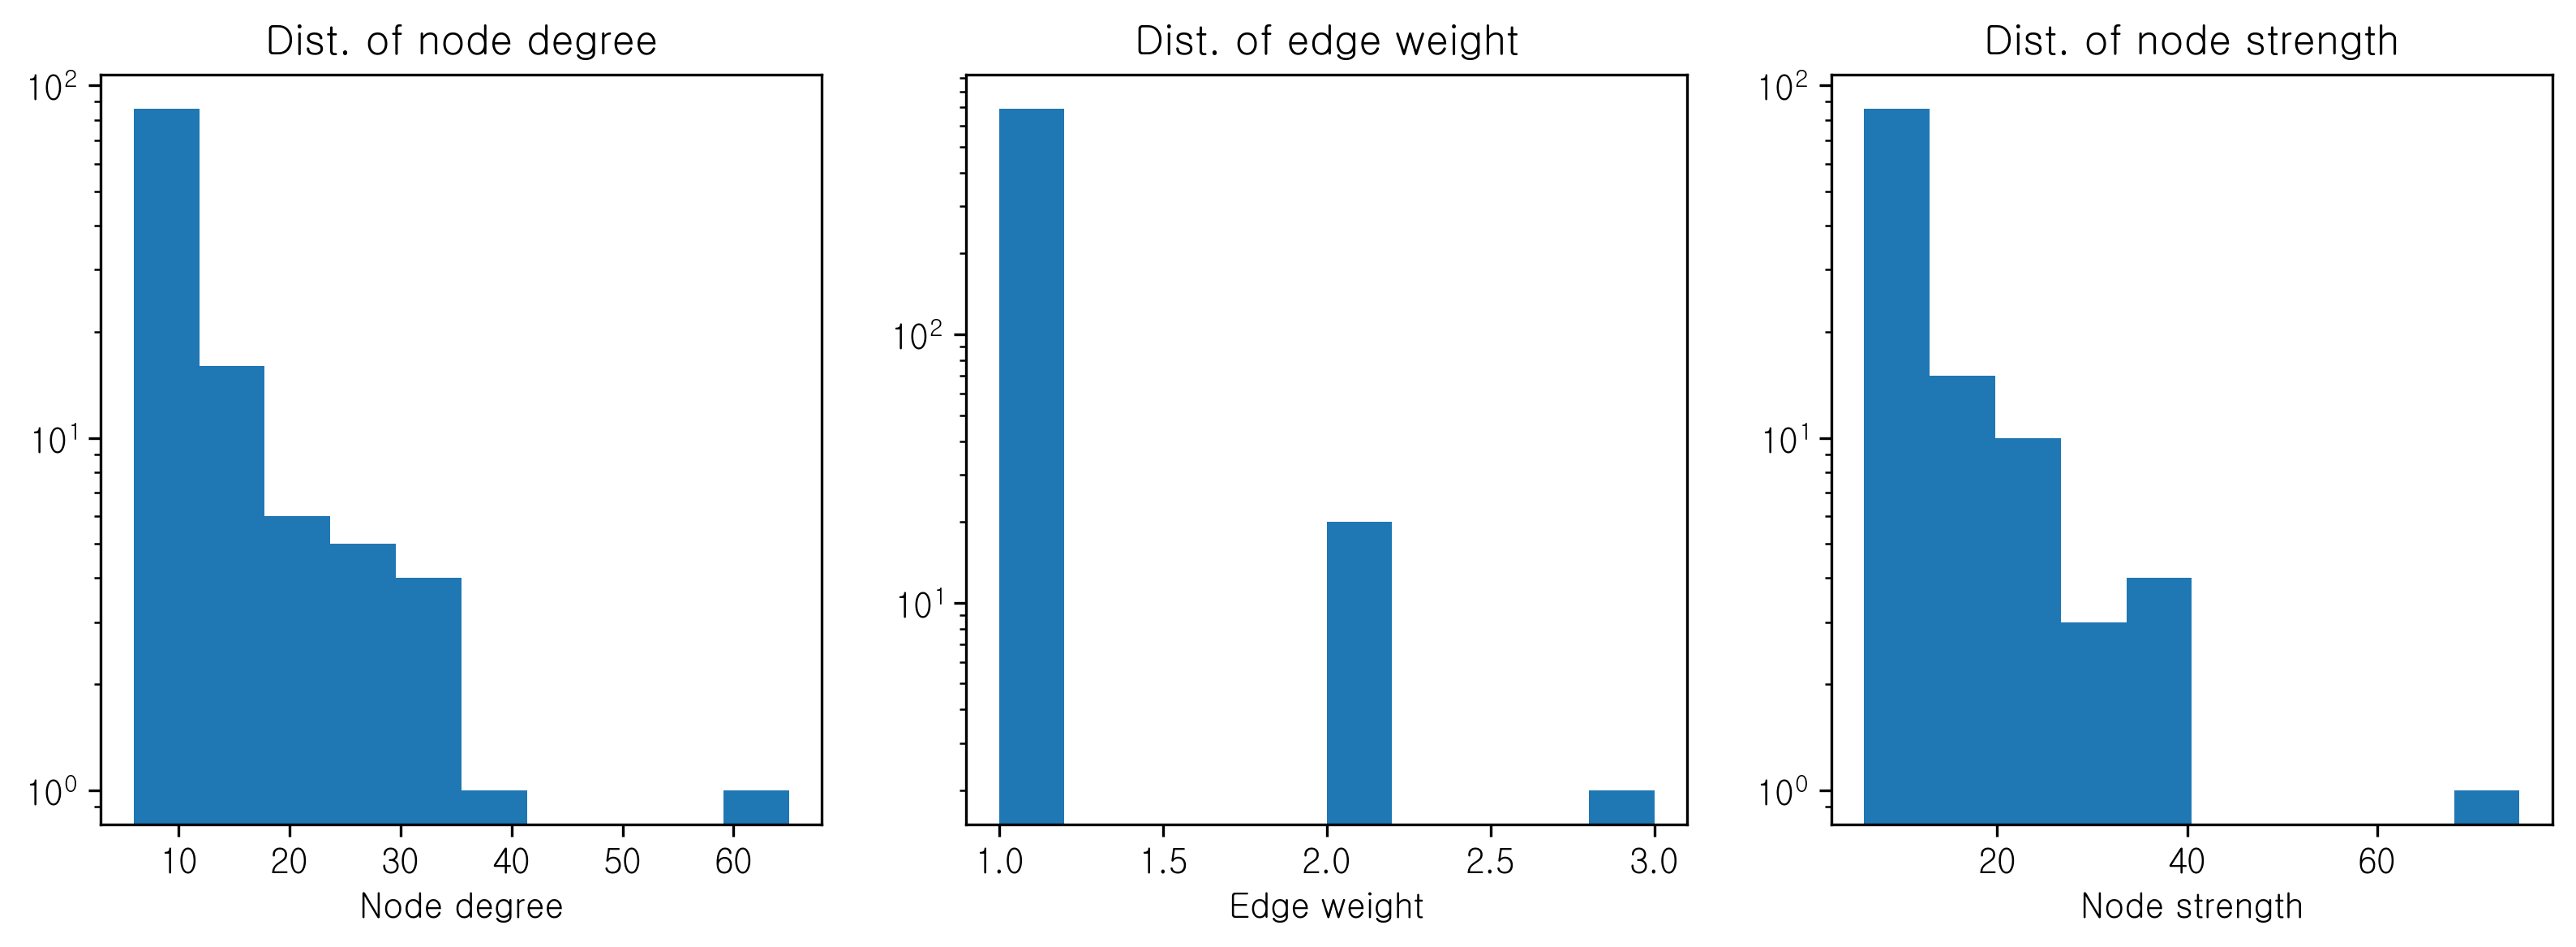

In [36]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [37]:
df = info(G)
df.head(20)

Node_ND  Node Degree                              Edge  \
0             Explain         65.0              (Explain, Applicate)   
1           Principle         36.0                  (Explain, Light)   
2               Light         35.0                   (Various, Save)   
3               Apply         33.0              (Various, Applicate)   
4           Applicate         33.0                (Various, Explain)   
5             Various         32.0      (Explain, Mechanical_energy)   
6             Example         29.0                   (Explain, Save)   
7                 Use         28.0              (Explain, Principle)   
8              Energy         25.0                    (Explain, Use)   
9          Technology         24.0          (Explain, Semiconductor)   
10          Recognize         24.0  (Relationship, Conservation_law)   
11          Procedure         22.0   (Understand, Mechanical_energy)   
12             Sensor         22.0         (Mechanical_energy, Heat)   
13          Transform         21.0    (Mechanical_energy, Transform)   
14             Effect         21.0               (Energy, Transform)   
15      Semiconductor         19.0                 (Heat, Transform)   
16  Mechanical_energy         18.0             (Example, Technology)   
17        Demonstrate         17.0                 (Save, Applicate)   
18               Save         17.0        (Everyday_life, Applicate)   
19         Phenomenon         17.0                (Applicate, Light)   

    Edge Weight            Node_NS  Node Strength            Node_BC  \
0             3            Explain           75.0            Explain   
1             3              Light           40.0              Apply   
2             2          Applicate           39.0            Various   
3             2          Principle           37.0        Demonstrate   
4             2            Various           35.0          Principle   
5             2              Apply           33.0            Example   
6             2            Example           30.0              Light   
7             2                Use           30.0          Applicate   
8             2             Energy           26.0          Transform   
9             2         Technology           25.0             Energy   
10            2          Transform           24.0  Mechanical_energy   
11            2          Recognize           24.0                Use   
12            2  Mechanical_energy           22.0          Procedure   
13            2          Procedure           22.0                Act   
14            2             Sensor           22.0         Technology   
15            2             Effect           21.0         Understand   
16            2               Save           20.0             Effect   
17            2      Semiconductor           20.0          Recognize   
18            2         Phenomenon           18.0   Conservation_law   
19            2        Demonstrate           17.0       Relationship   

    Betweenness Centrality  
0                 0.355189  
1                 0.175339  
2                 0.175326  
3                 0.143430  
4                 0.141487  
5                 0.139287  
6                 0.121124  
7                 0.107025  
8                 0.093537  
9                 0.090565  
10                0.087603  
11                0.085981  
12                0.083675  
13                0.082364  
14                0.071847  
15                0.066307  
16                0.062938  
17                0.061847  
18                0.059082  
19                0.059082

## 역학과 에너지

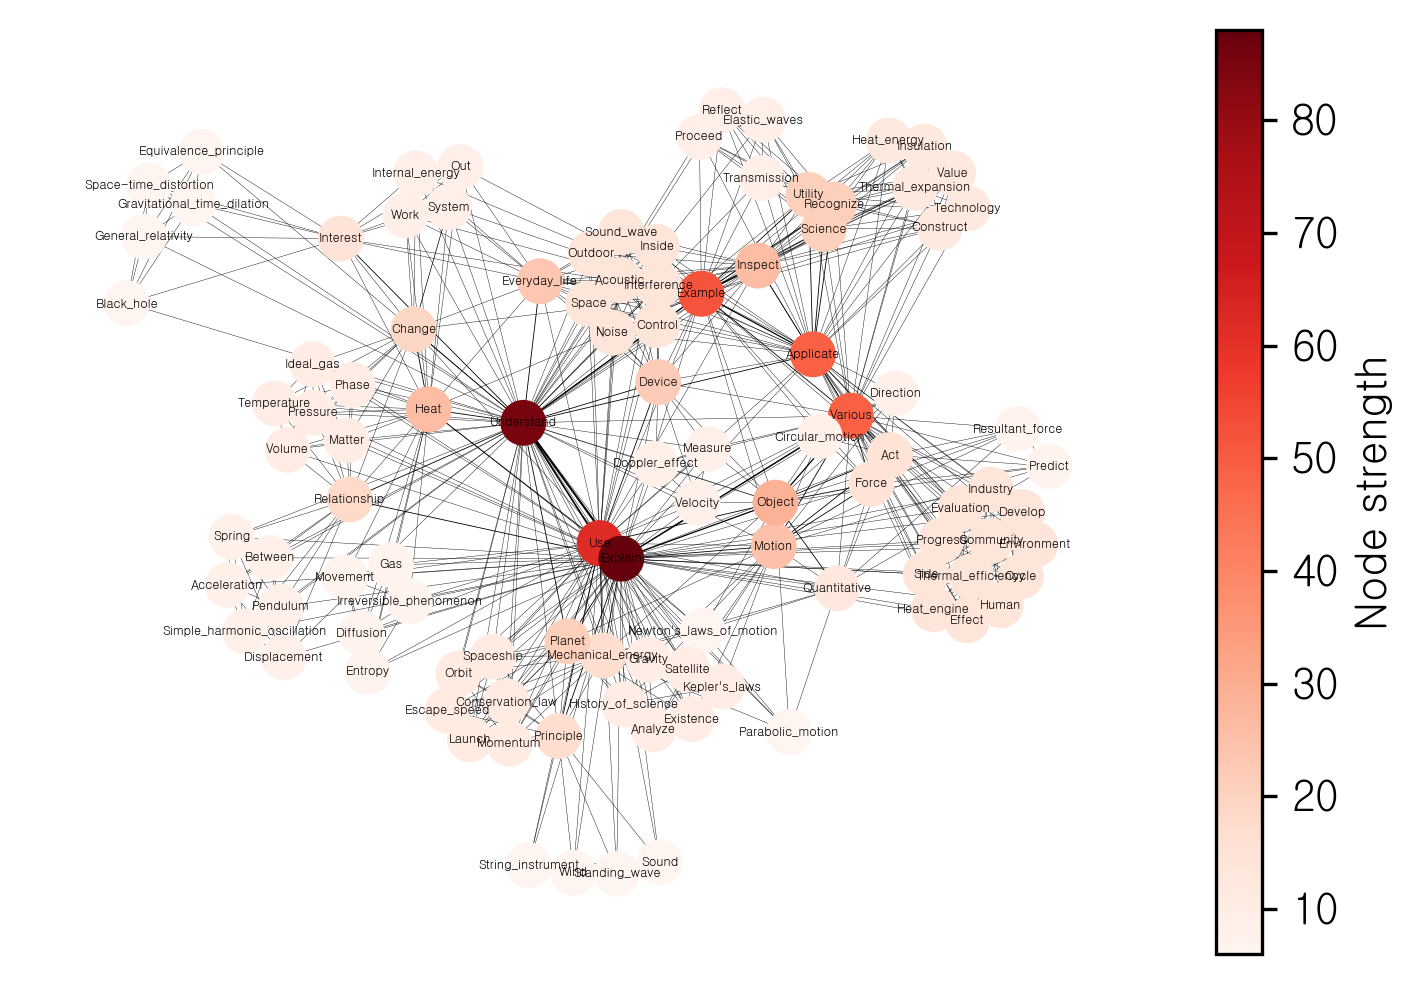

In [38]:
#(itr, seed, k, file_name)
subject_graph(150,8, 1.0, file_lst[4])

In [39]:
G = graph(file_lst[4])

Number of nodes: 105
Number of edges: 715
Degree avg: 13.62, Degree std: 10.54
EdgeWeight avg: 1.09, EdgeWeight std: 0.39
NodeWeight avg: 14.88, NodeWeight std: 13.66


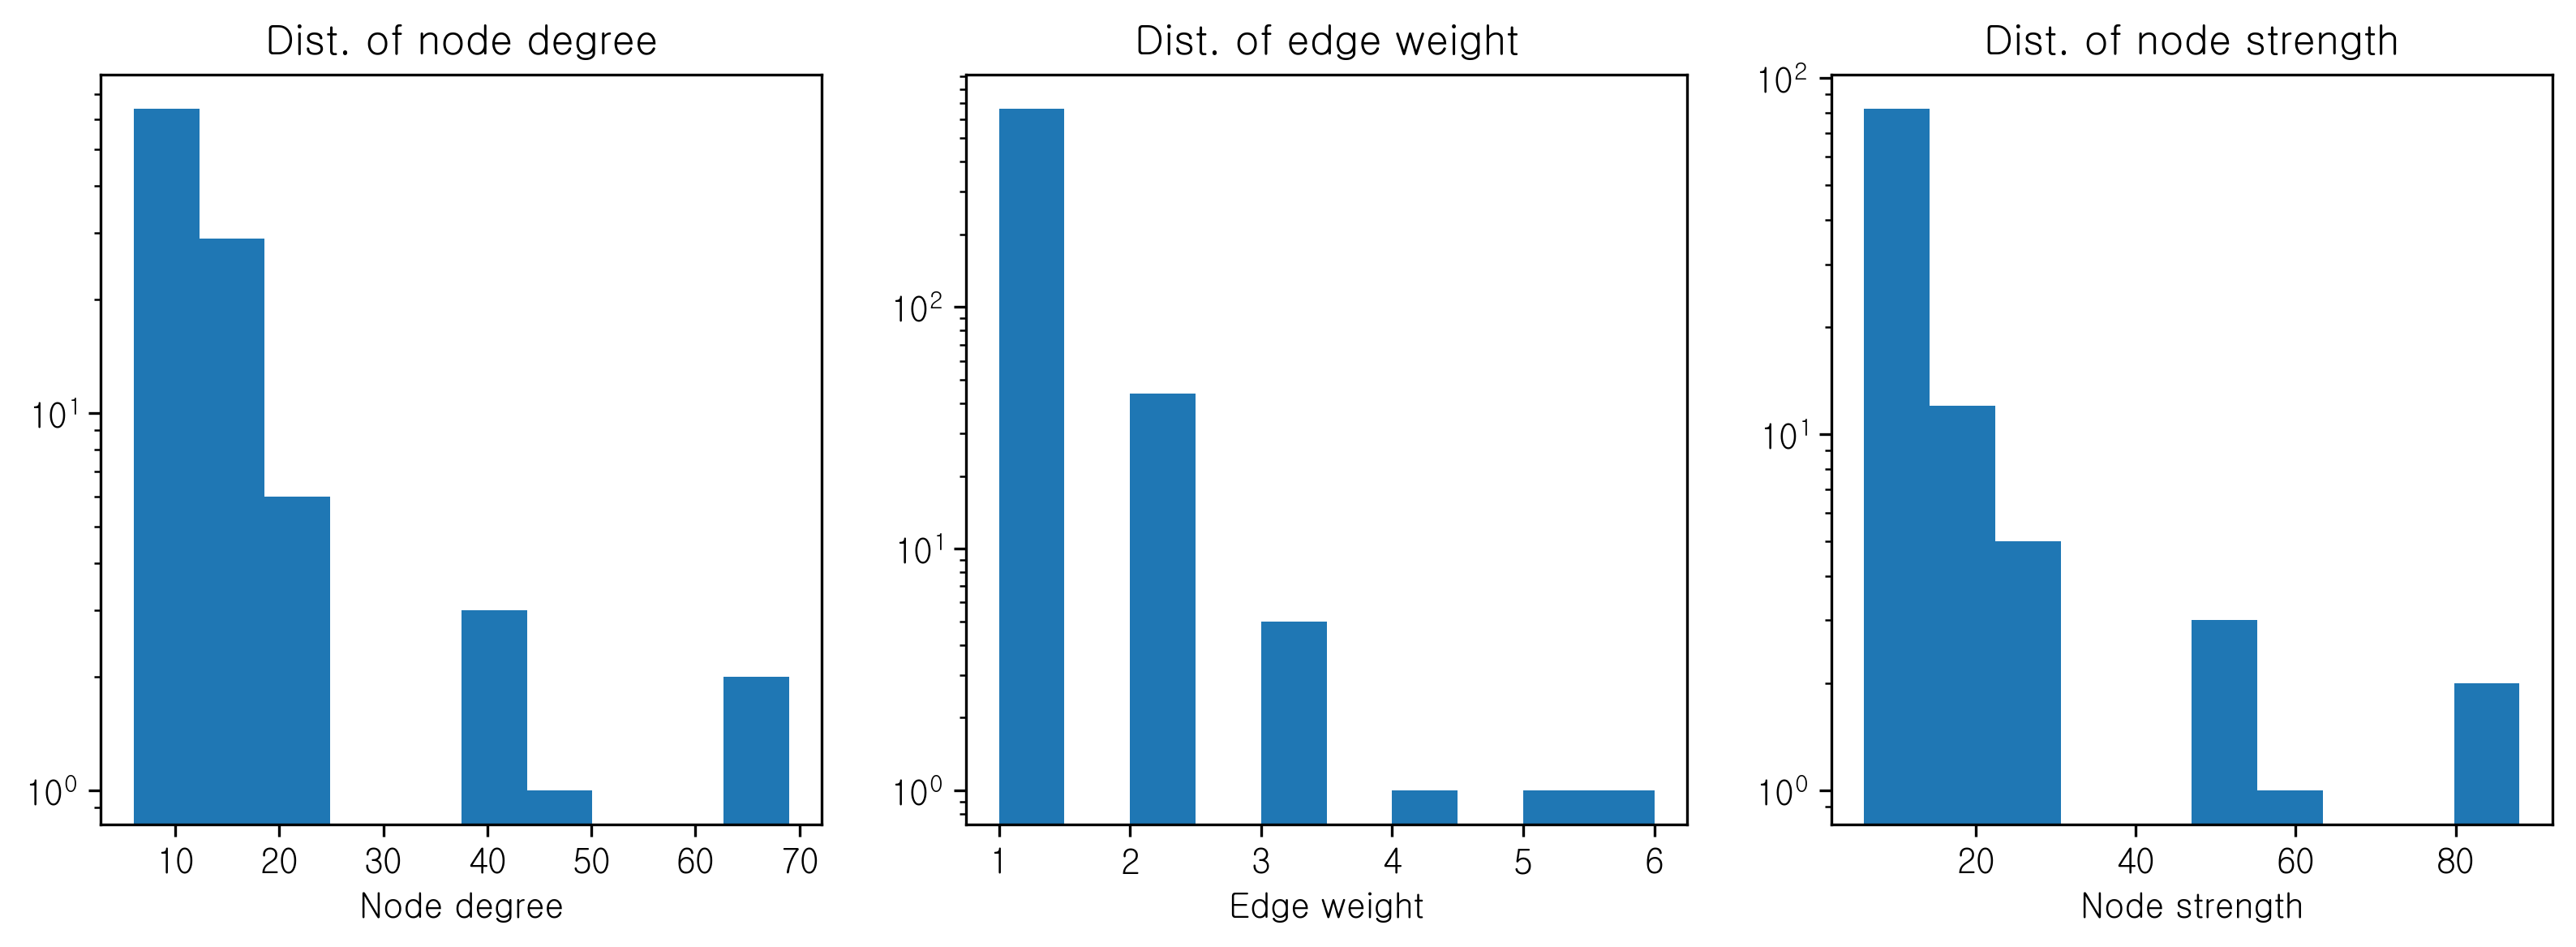

In [40]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [41]:
df = info(G)
df.head(20)

Node_ND  Node Degree                    Edge  Edge Weight  \
0             Explain         69.0          (Use, Explain)            6   
1          Understand         68.0   (Explain, Understand)            5   
2                 Use         49.0       (Use, Understand)            4   
3             Example         42.0       (Various, Object)            3   
4           Applicate         41.0      (Various, Explain)            3   
5             Various         40.0       (Object, Explain)            3   
6             Inspect         24.0    (Example, Applicate)            3   
7                Heat         23.0   (Example, Understand)            3   
8       Everyday_life         21.0        (Various, Force)            2   
9              Motion         20.0       (Various, Motion)            2   
10             Object         20.0          (Various, Act)            2   
11             Device         20.0      (Various, Example)            2   
12             Planet         18.0    (Various, Applicate)            2   
13            Science         17.0         (Force, Motion)            2   
14            Utility         17.0         (Force, Object)            2   
15          Recognize         17.0            (Force, Act)            2   
16             Change         17.0        (Motion, Object)            2   
17       Relationship         16.0           (Motion, Act)            2   
18  Mechanical_energy         15.0       (Motion, Explain)            2   
19          Principle         15.0  (Object, Quantitative)            2   

              Node_NS  Node Strength            Node_BC  \
0             Explain           88.0            Explain   
1          Understand           85.0         Understand   
2                 Use           62.0                Use   
3             Example           52.0            Various   
4             Various           49.0            Example   
5           Applicate           49.0          Applicate   
6              Object           29.0               Heat   
7             Inspect           26.0             Object   
8                Heat           26.0             Motion   
9              Motion           25.0      Everyday_life   
10      Everyday_life           23.0            Inspect   
11             Device           22.0           Interest   
12             Planet           21.0       Relationship   
13            Science           21.0             Change   
14            Utility           21.0             Device   
15          Recognize           21.0             Planet   
16             Change           19.0          Principle   
17       Relationship           18.0  Mechanical_energy   
18  Mechanical_energy           17.0            Utility   
19          Principle           17.0          Recognize   

    Betweenness Centrality  
0                 0.319073  
1                 0.316466  
2                 0.194349  
3                 0.162439  
4                 0.152214  
5                 0.148446  
6                 0.088626  
7                 0.071094  
8                 0.066415  
9                 0.060420  
10                0.059062  
11                0.058874  
12                0.054893  
13                0.052301  
14                0.048957  
15                0.048043  
16                0.043255  
17                0.039433  
18                0.035857  
19                0.035857

## 전자기와 양자

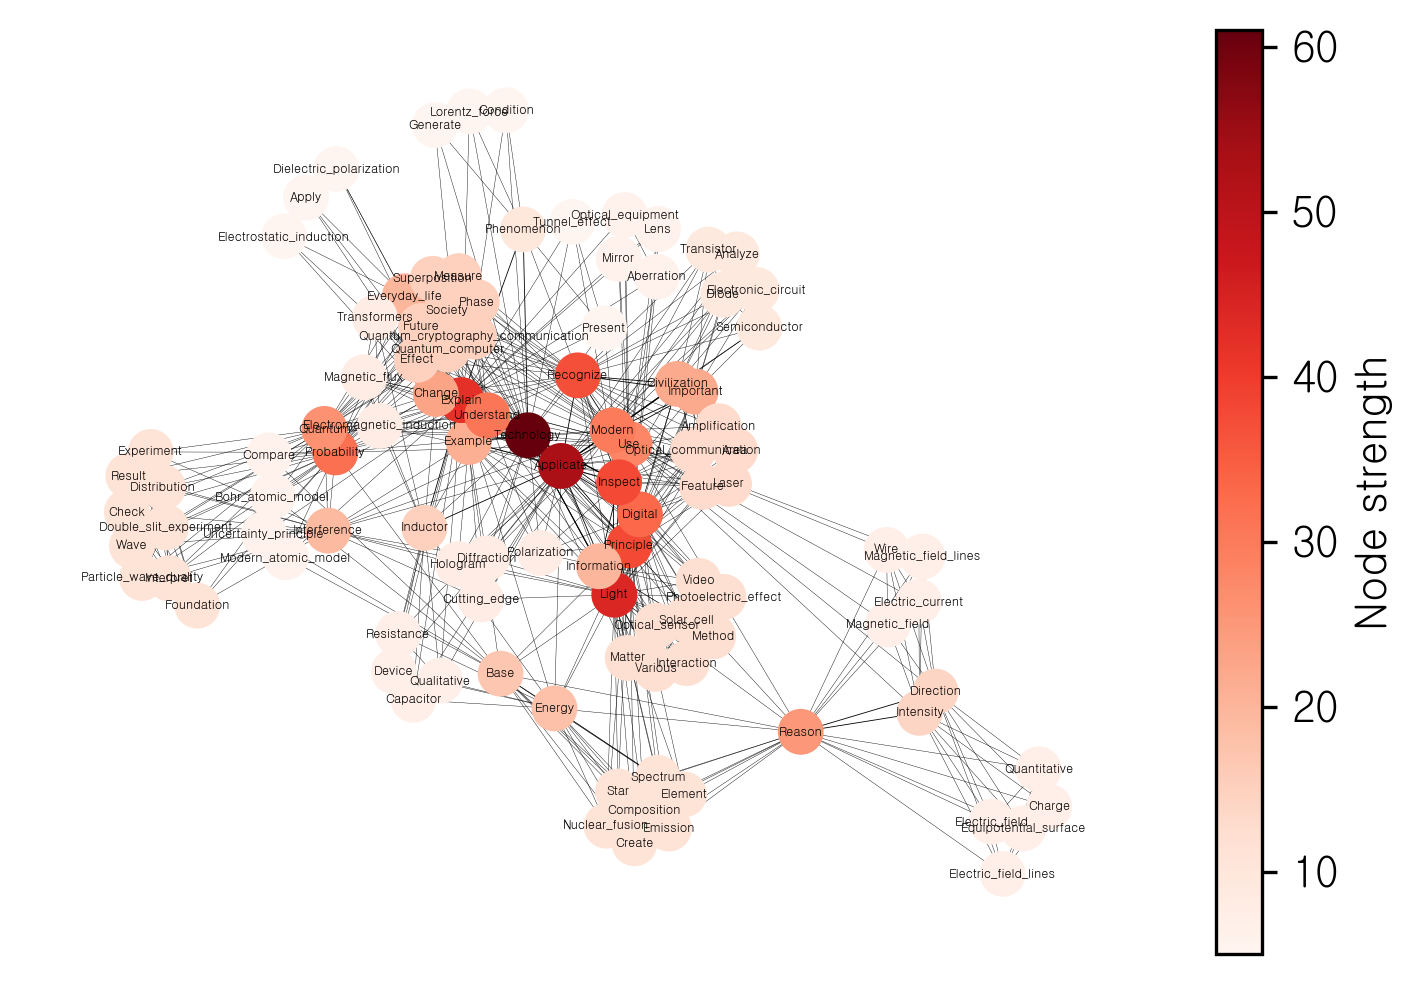

In [42]:
#(itr, seed, k, file_name)
subject_graph(150,8, 1.0, file_lst[5])

In [43]:
G = graph(file_lst[5])

Number of nodes: 105
Number of edges: 695
Degree avg: 13.24, Degree std: 8.41
EdgeWeight avg: 1.07, EdgeWeight std: 0.29
NodeWeight avg: 14.19, NodeWeight std: 10.48


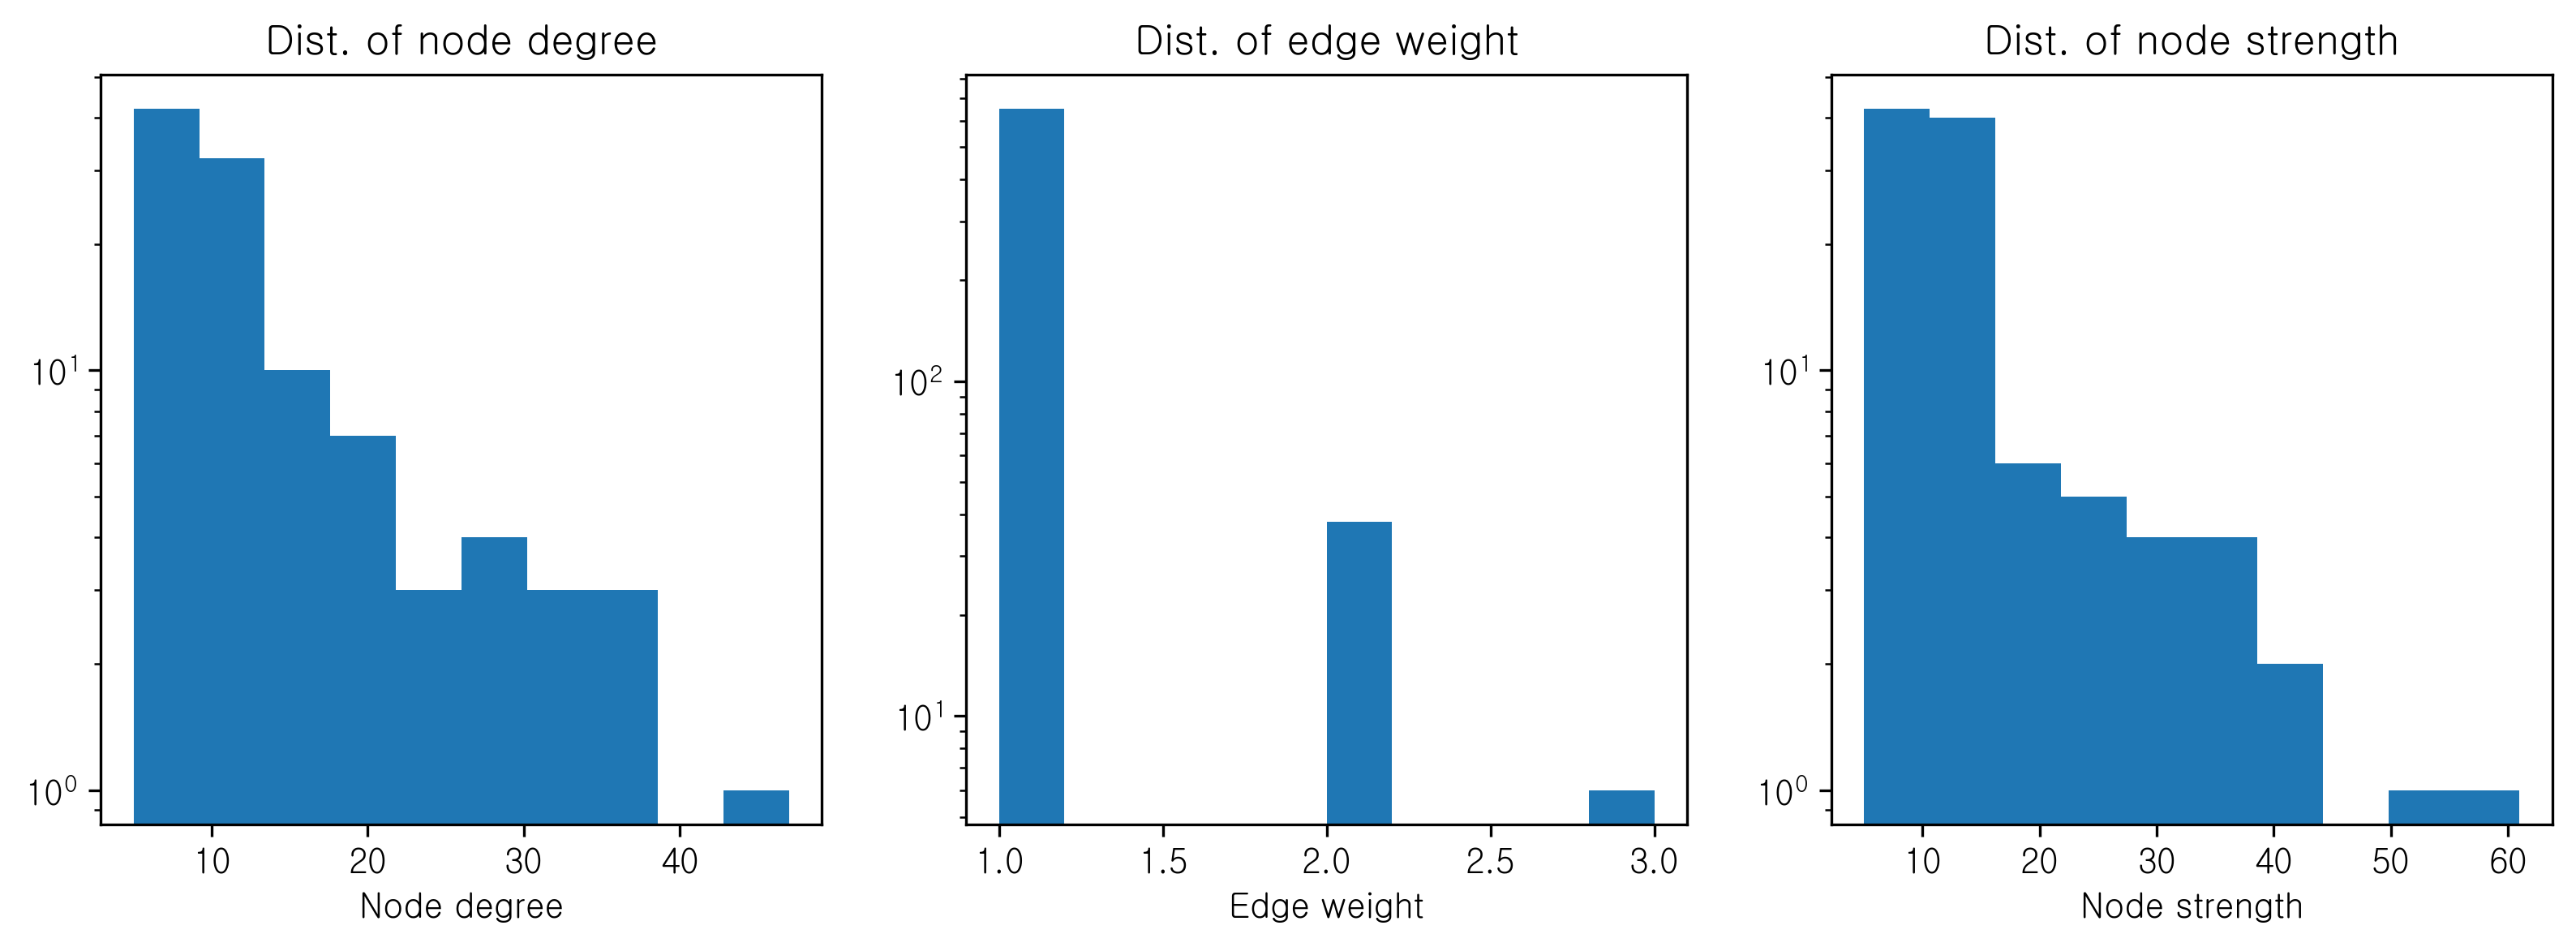

In [44]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [45]:
df = info(G)
df.head(20)

Node_ND  Node Degree                       Edge  Edge Weight  \
0      Technology         47.0      (Explain, Technology)            3   
1       Applicate         38.0   (Technology, Understand)            3   
2           Light         38.0    (Technology, Applicate)            3   
3         Explain         37.0      (Technology, Inspect)            3   
4       Principle         34.0        (Applicate, Modern)            3   
5       Recognize         33.0         (Digital, Inspect)            3   
6     Probability         31.0        (Direction, Reason)            2   
7         Inspect         30.0     (Direction, Intensity)            2   
8             Use         28.0        (Reason, Intensity)            2   
9      Understand         27.0      (Example, Technology)            2   
10        Digital         26.0       (Example, Applicate)            2   
11        Quantum         25.0      (Explain, Phenomenon)            2   
12         Modern         24.0       (Explain, Applicate)            2   
13         Reason         23.0        (Explain, Inductor)            2   
14         Change         21.0   (Technology, Phenomenon)            2   
15  Everyday_life         20.0       (Technology, Change)            2   
16        Example         19.0        (Technology, Light)            2   
17   Interference         19.0      (Technology, Digital)            2   
18         Energy         18.0  (Technology, Information)            2   
19      Important         18.0    (Understand, Applicate)            2   

          Node_NS  Node Strength        Node_BC  Betweenness Centrality  
0      Technology           61.0     Technology                0.202466  
1       Applicate           53.0        Explain                0.190485  
2           Light           44.0            Use                0.164825  
3         Explain           42.0          Light                0.157158  
4       Principle           38.0      Applicate                0.153970  
5         Inspect           38.0         Reason                0.149024  
6       Recognize           37.0      Principle                0.146557  
7         Digital           33.0    Probability                0.133925  
8     Probability           32.0      Recognize                0.111917  
9      Understand           31.0        Inspect                0.095564  
10         Modern           30.0        Quantum                0.089157  
11            Use           28.0     Understand                0.082726  
12        Quantum           26.0   Interference                0.079626  
13         Reason           25.0           Base                0.075782  
14         Change           23.0         Energy                0.072094  
15      Important           22.0        Digital                0.072008  
16   Civilization           22.0         Modern                0.068813  
17        Example           21.0        Example                0.064951  
18  Everyday_life           20.0  Everyday_life                0.056527  
19    Information           20.0         Change                0.056186